# Fraud Detection in Minority Class of Credit Card Transactions

## 1. Import Libraries

In [33]:
import numpy as np
import pandas as pd
# Stats Libraries
from scipy import stats
from scipy.stats import uniform, randint
# Scaling Library
from sklearn.preprocessing import StandardScaler,RobustScaler
# Splittiing Libraries
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV, learning_curve, cross_val_score
# Validation Libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score
from sklearn.metrics import recall_score, f1_score, fbeta_score, accuracy_score, precision_recall_curve, average_precision_score
# Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Modeling Libraries
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Sampling Libraries
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

### 1.1 Read Dataset

In [34]:
df=pd.read_csv("creditcard.csv")

In [35]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 1.2. Basic Data Overview

In [36]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (284807, 31)


In [37]:
print("Data types and missing values:\n")
df.drop_duplicates().info()

Data types and missing values:

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-nu

In [38]:
print("Descriptive statistics:\n")
df.describe().T

Descriptive statistics:



,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [39]:
print(f"Null Values Present in DataFrame : {df.isnull().values.any()}")

Null Values Present in DataFrame : False


## 2. Data Distribution

### 2.1 Distribution of Data for Each Column

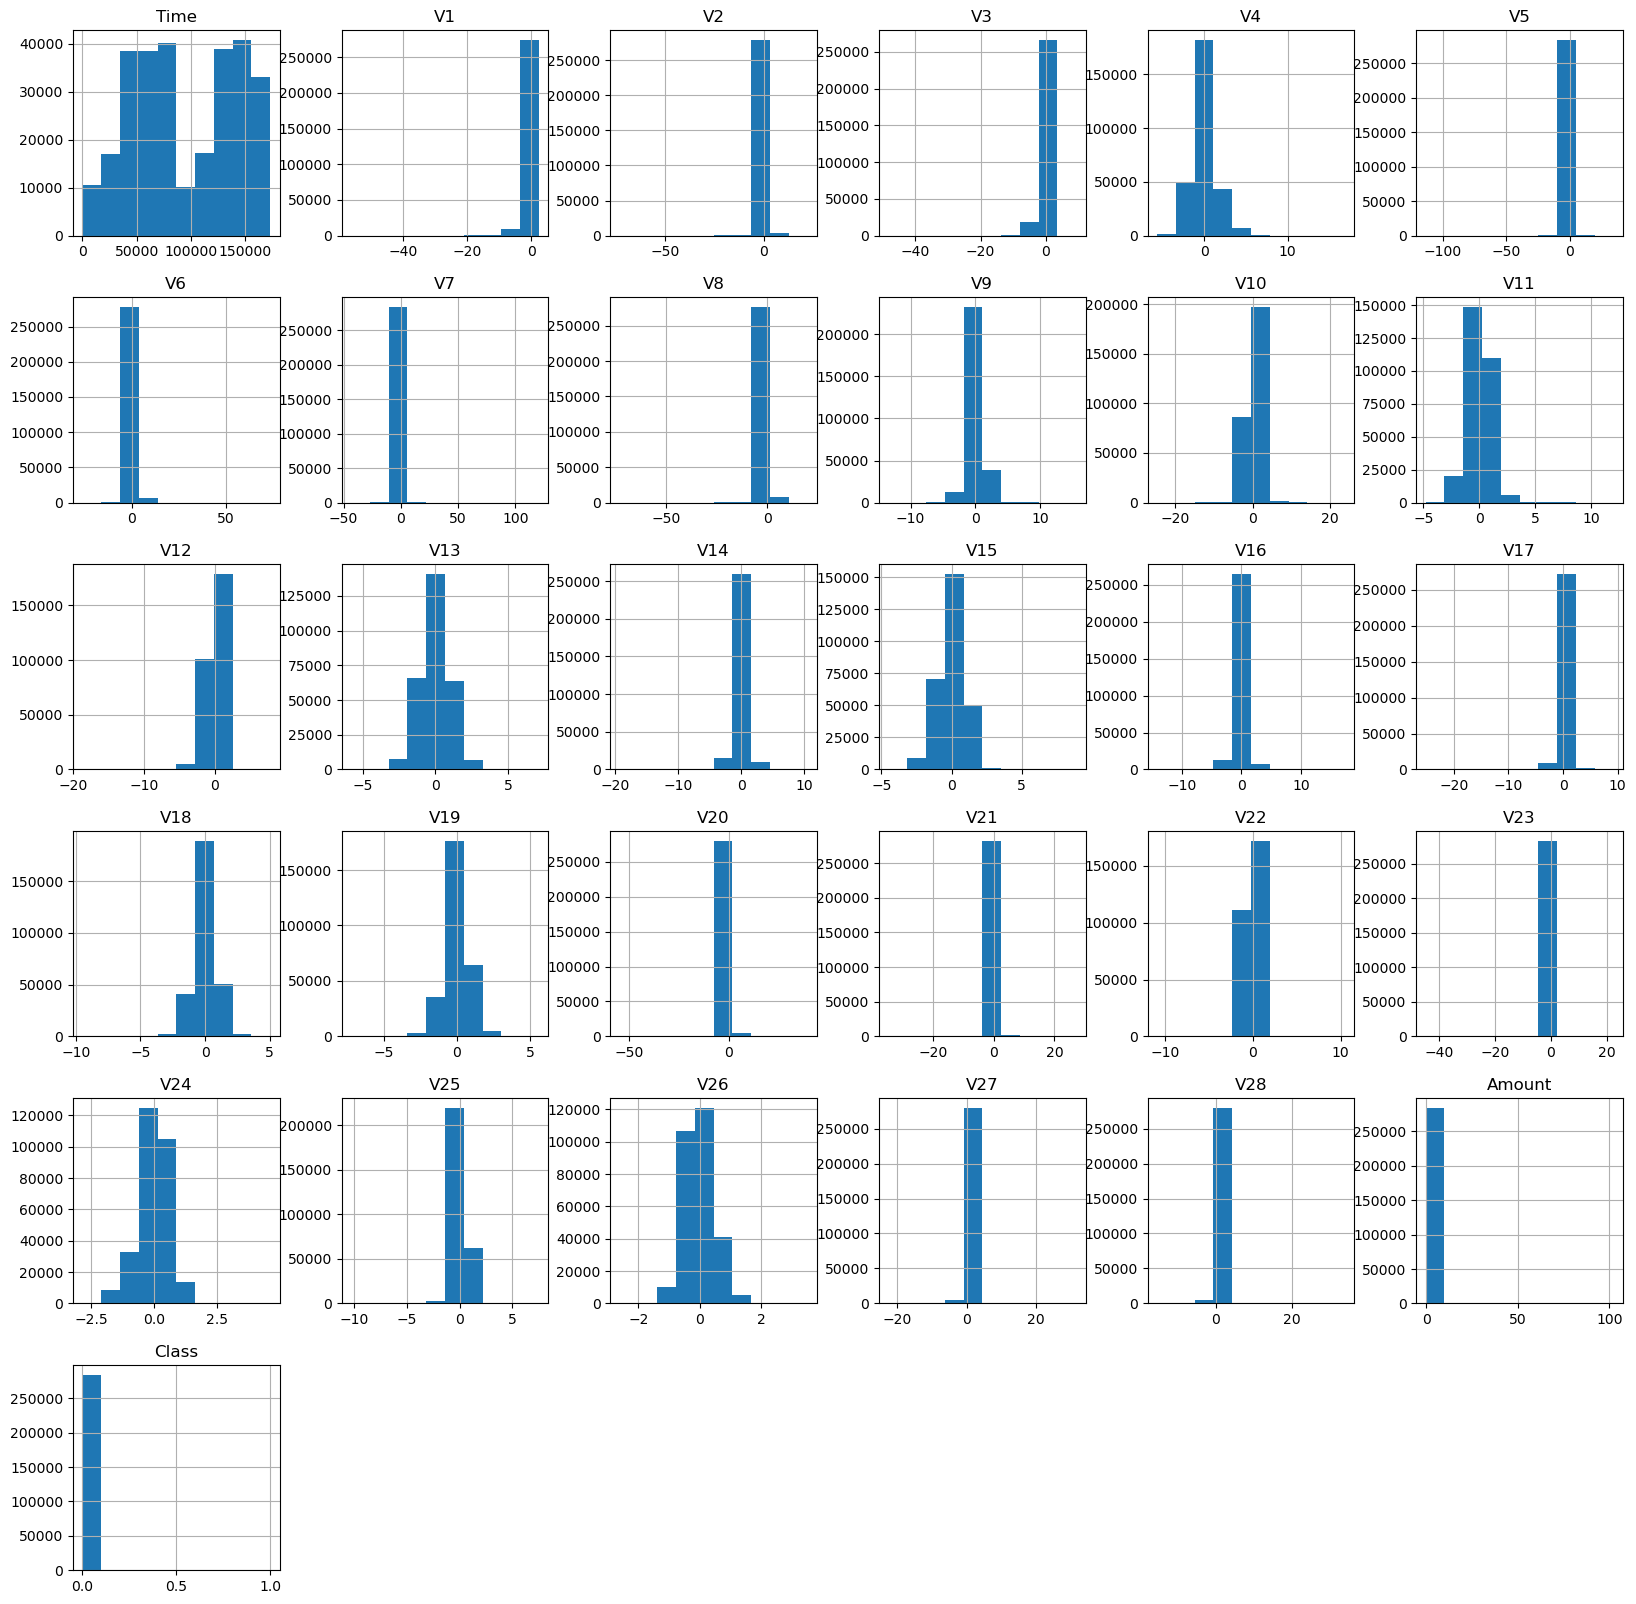

In [98]:
df.hist(figsize = (20, 20))
plt.show()

### 2.2 Class Distribution

In [41]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


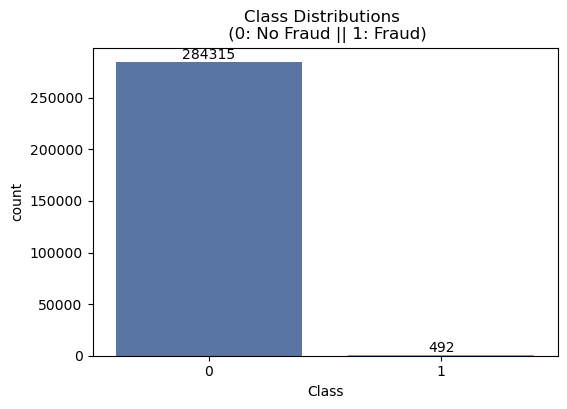

In [42]:
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='Class', data=df,palette="deep")
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Class Distributions \n (0: No Fraud || 1: Fraud)")
plt.show()

In [43]:
df_NonFraud = df[df['Class']==0]
df_Fraud = df[df['Class']==1]

### 2.3 Feature Distribution

#### 2.3.1 Plotting the distribution of 'Amount' and 'Time' For Non Fraud

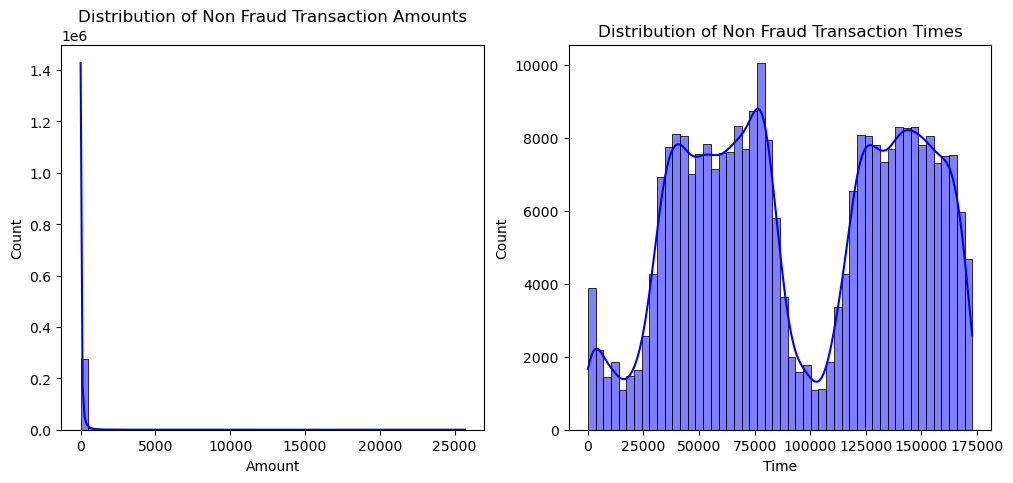

In [44]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(df_NonFraud['Amount'], color='blue', bins=50, kde=True)
plt.title("Distribution of Non Fraud Transaction Amounts")

plt.subplot(1, 2, 2)
sns.histplot(df_NonFraud['Time'], color='blue', bins=50, kde=True)
plt.title("Distribution of Non Fraud Transaction Times")

plt.show()

#### 2.3.2 Plotting the distribution of 'Amount' and 'Time' For Fraud

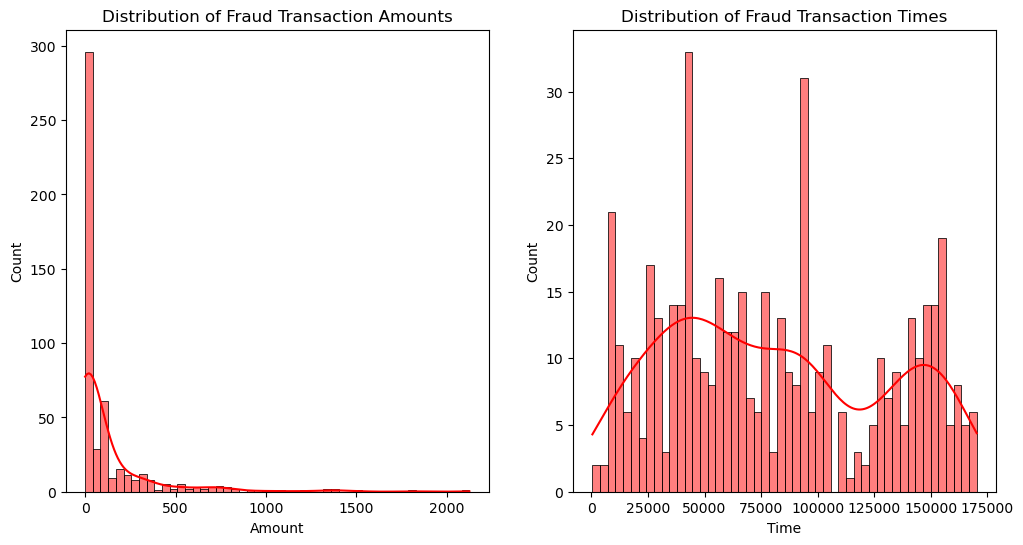

In [45]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_Fraud['Amount'], color='red', bins=50, kde=True)
plt.title("Distribution of Fraud Transaction Amounts")

plt.subplot(1, 2, 2)
sns.histplot(df_Fraud['Time'], color='red', bins=50, kde=True)
plt.title("Distribution of Fraud Transaction Times")

plt.show()

#### 2.3.3 Time vs. Amount Analysis

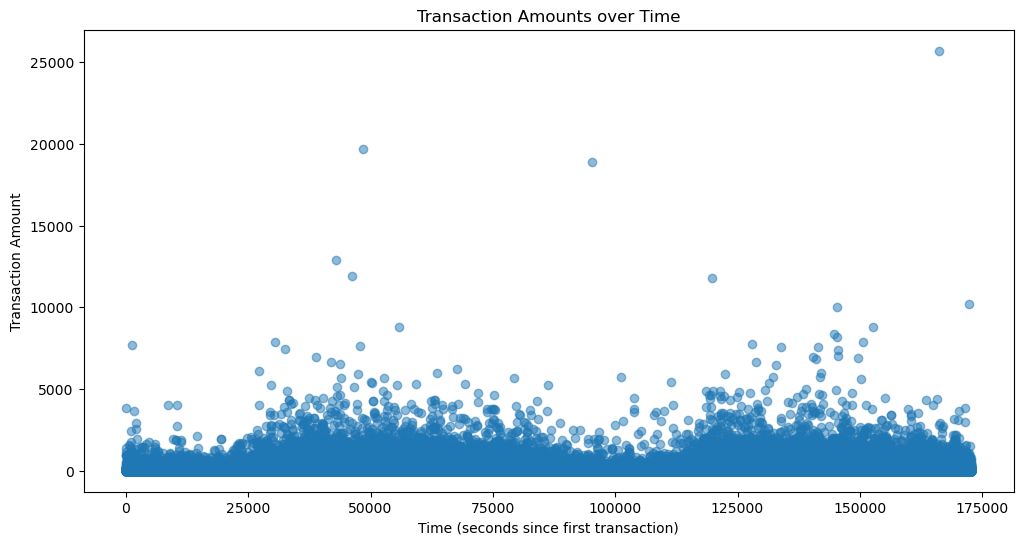

In [46]:
plt.figure(figsize=(12, 6))
plt.scatter(df_NonFraud['Time'], df_NonFraud['Amount'], alpha=0.5)
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amounts over Time")
plt.show()

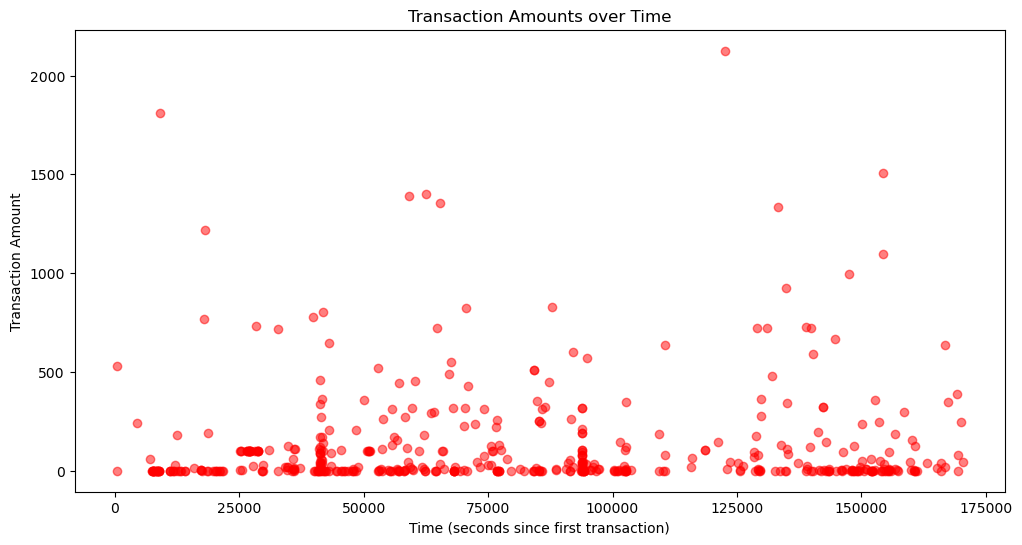

In [47]:
plt.figure(figsize=(12, 6))
plt.scatter(df_Fraud['Time'], df_Fraud['Amount'], alpha=0.5,color='red')
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amounts over Time")
plt.show()

### 2.4 Checking for Ouliers

In [48]:
numeric_columns = (list(df.loc[:, 'V1':'Amount']))

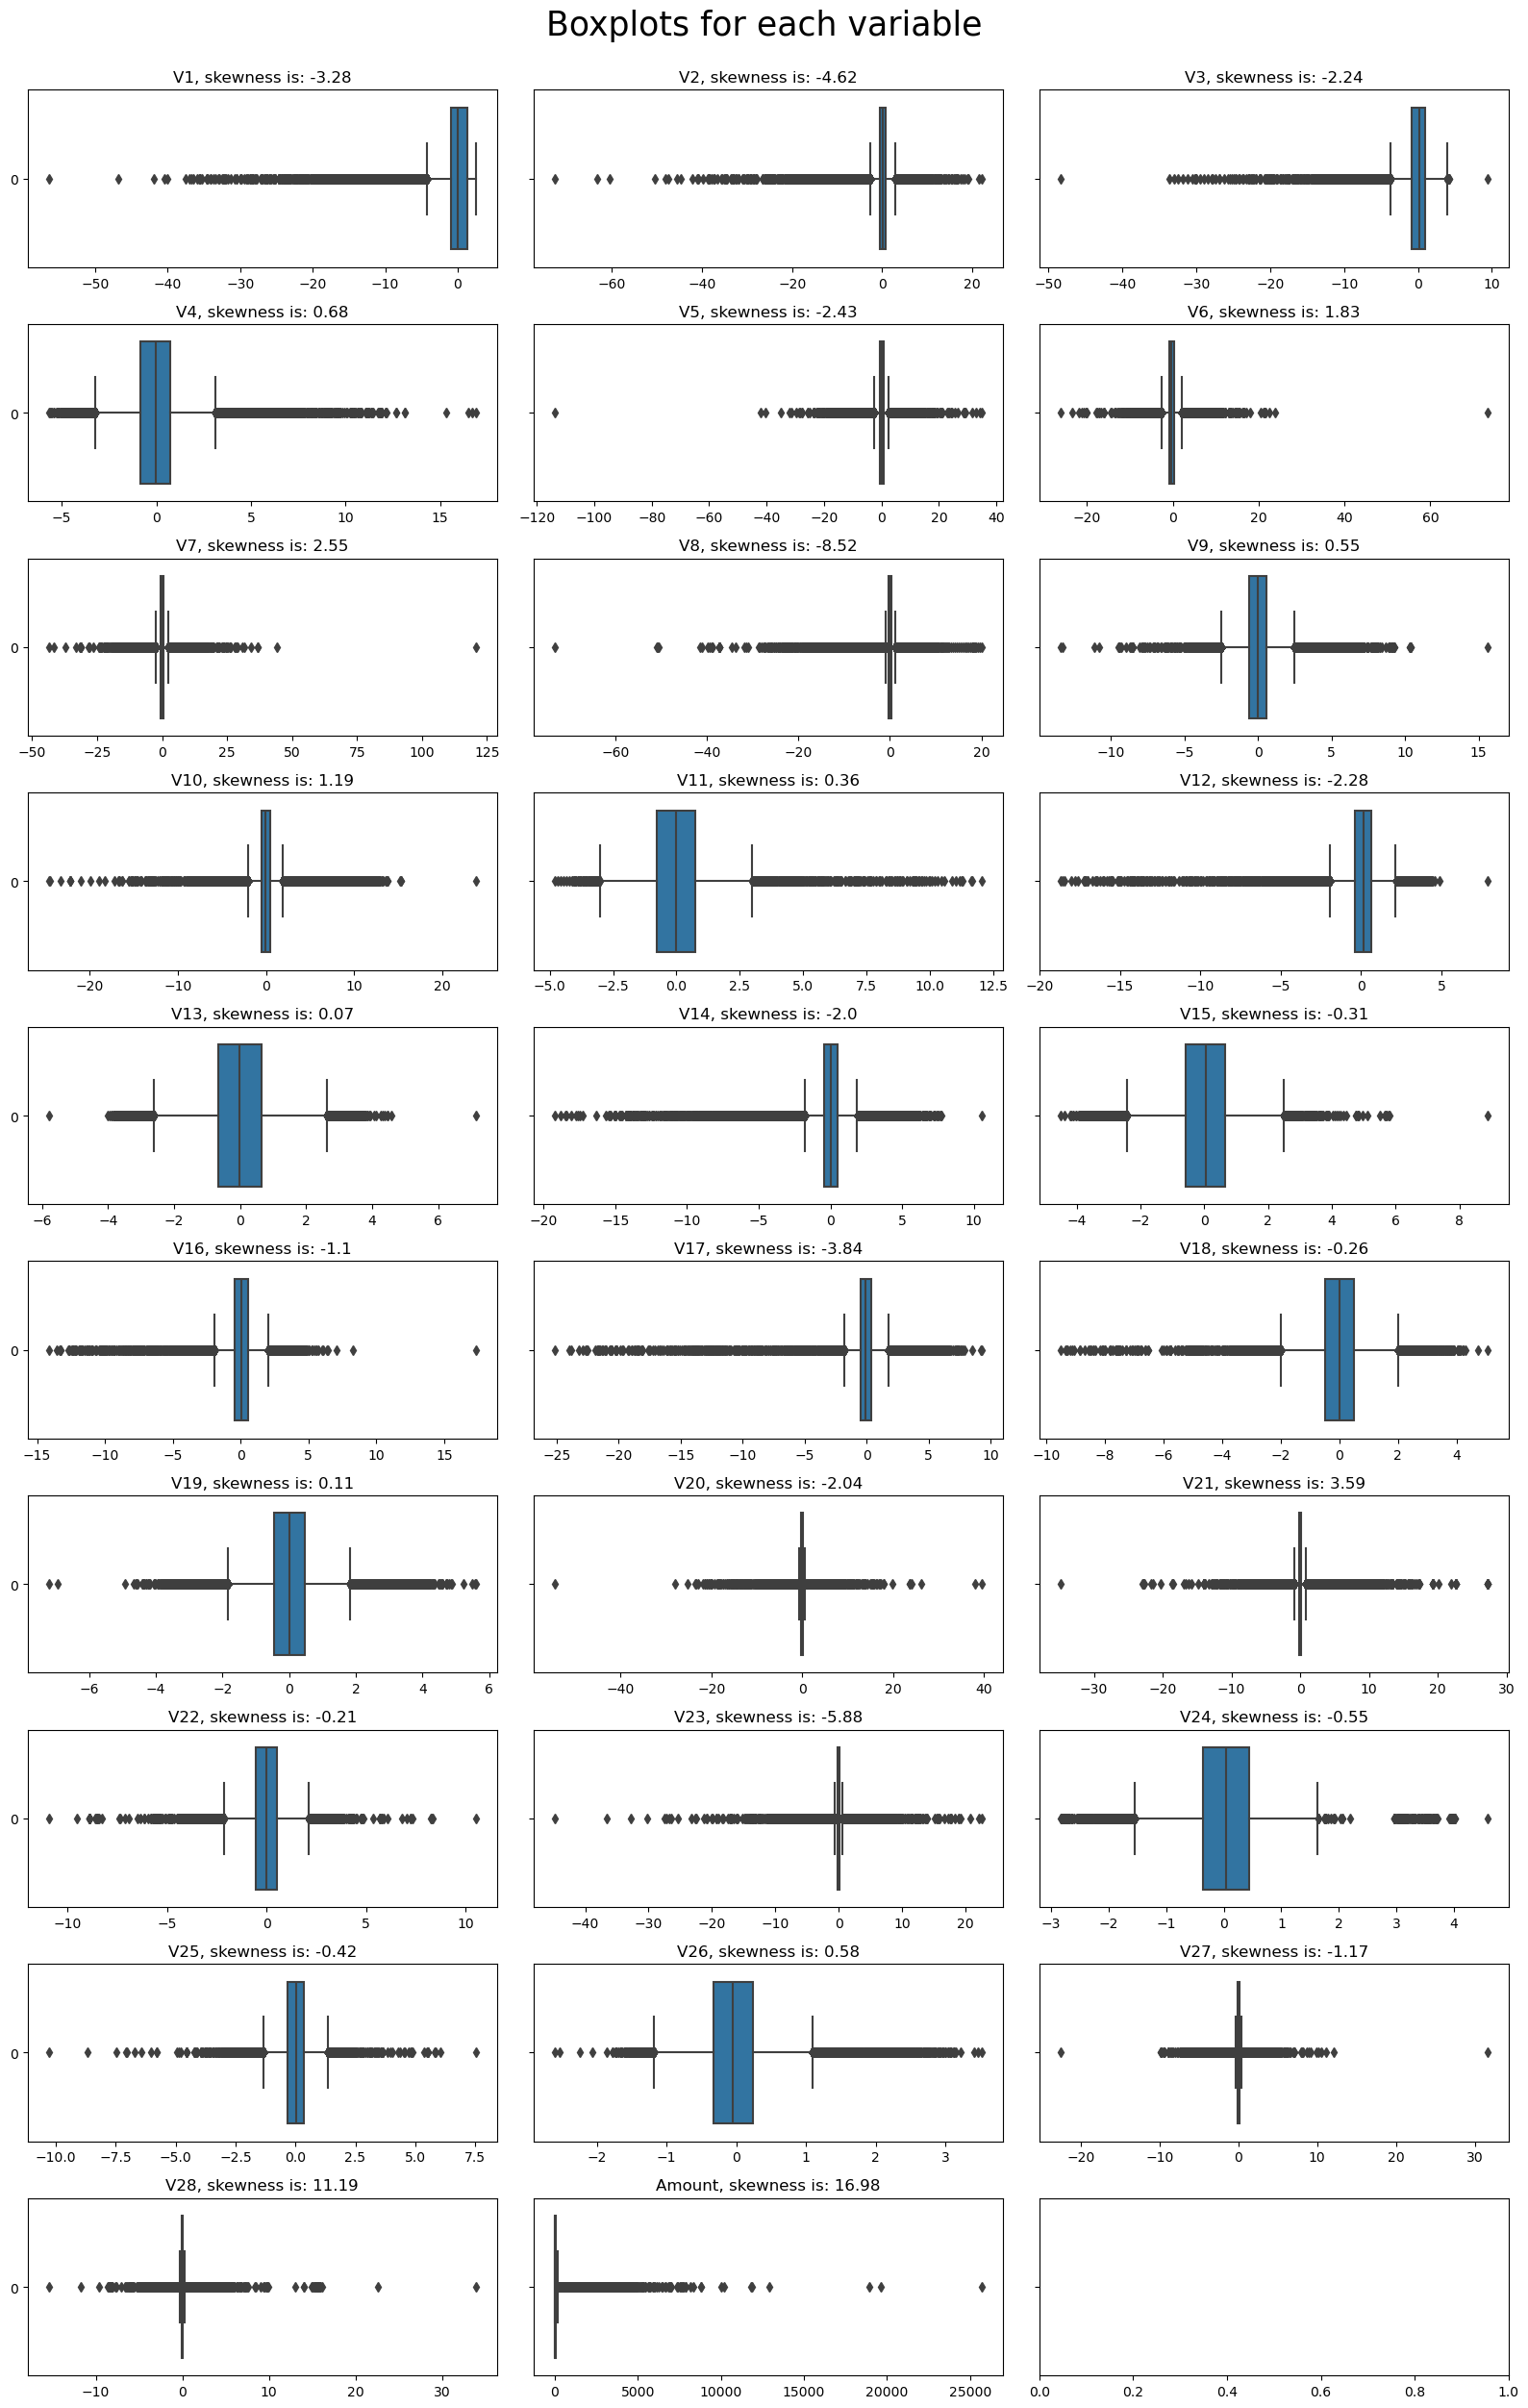

In [49]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()
plt.show()

In [50]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [51]:
Outliers_IQR = IQR_method(df,1,numeric_columns)
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 31904


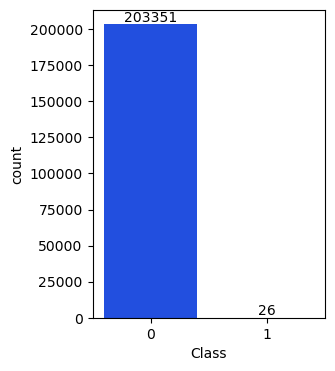

In [52]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df_out,palette="bright")
for i in ax.containers:
    ax.bar_label(i,)

There are only 26 Values left for Minorioty Class

For a Highly Imbalanced Dataset such as this one where there are less number of Target Variable to begin with it would be detrimental

## 3. Correlation Matrix

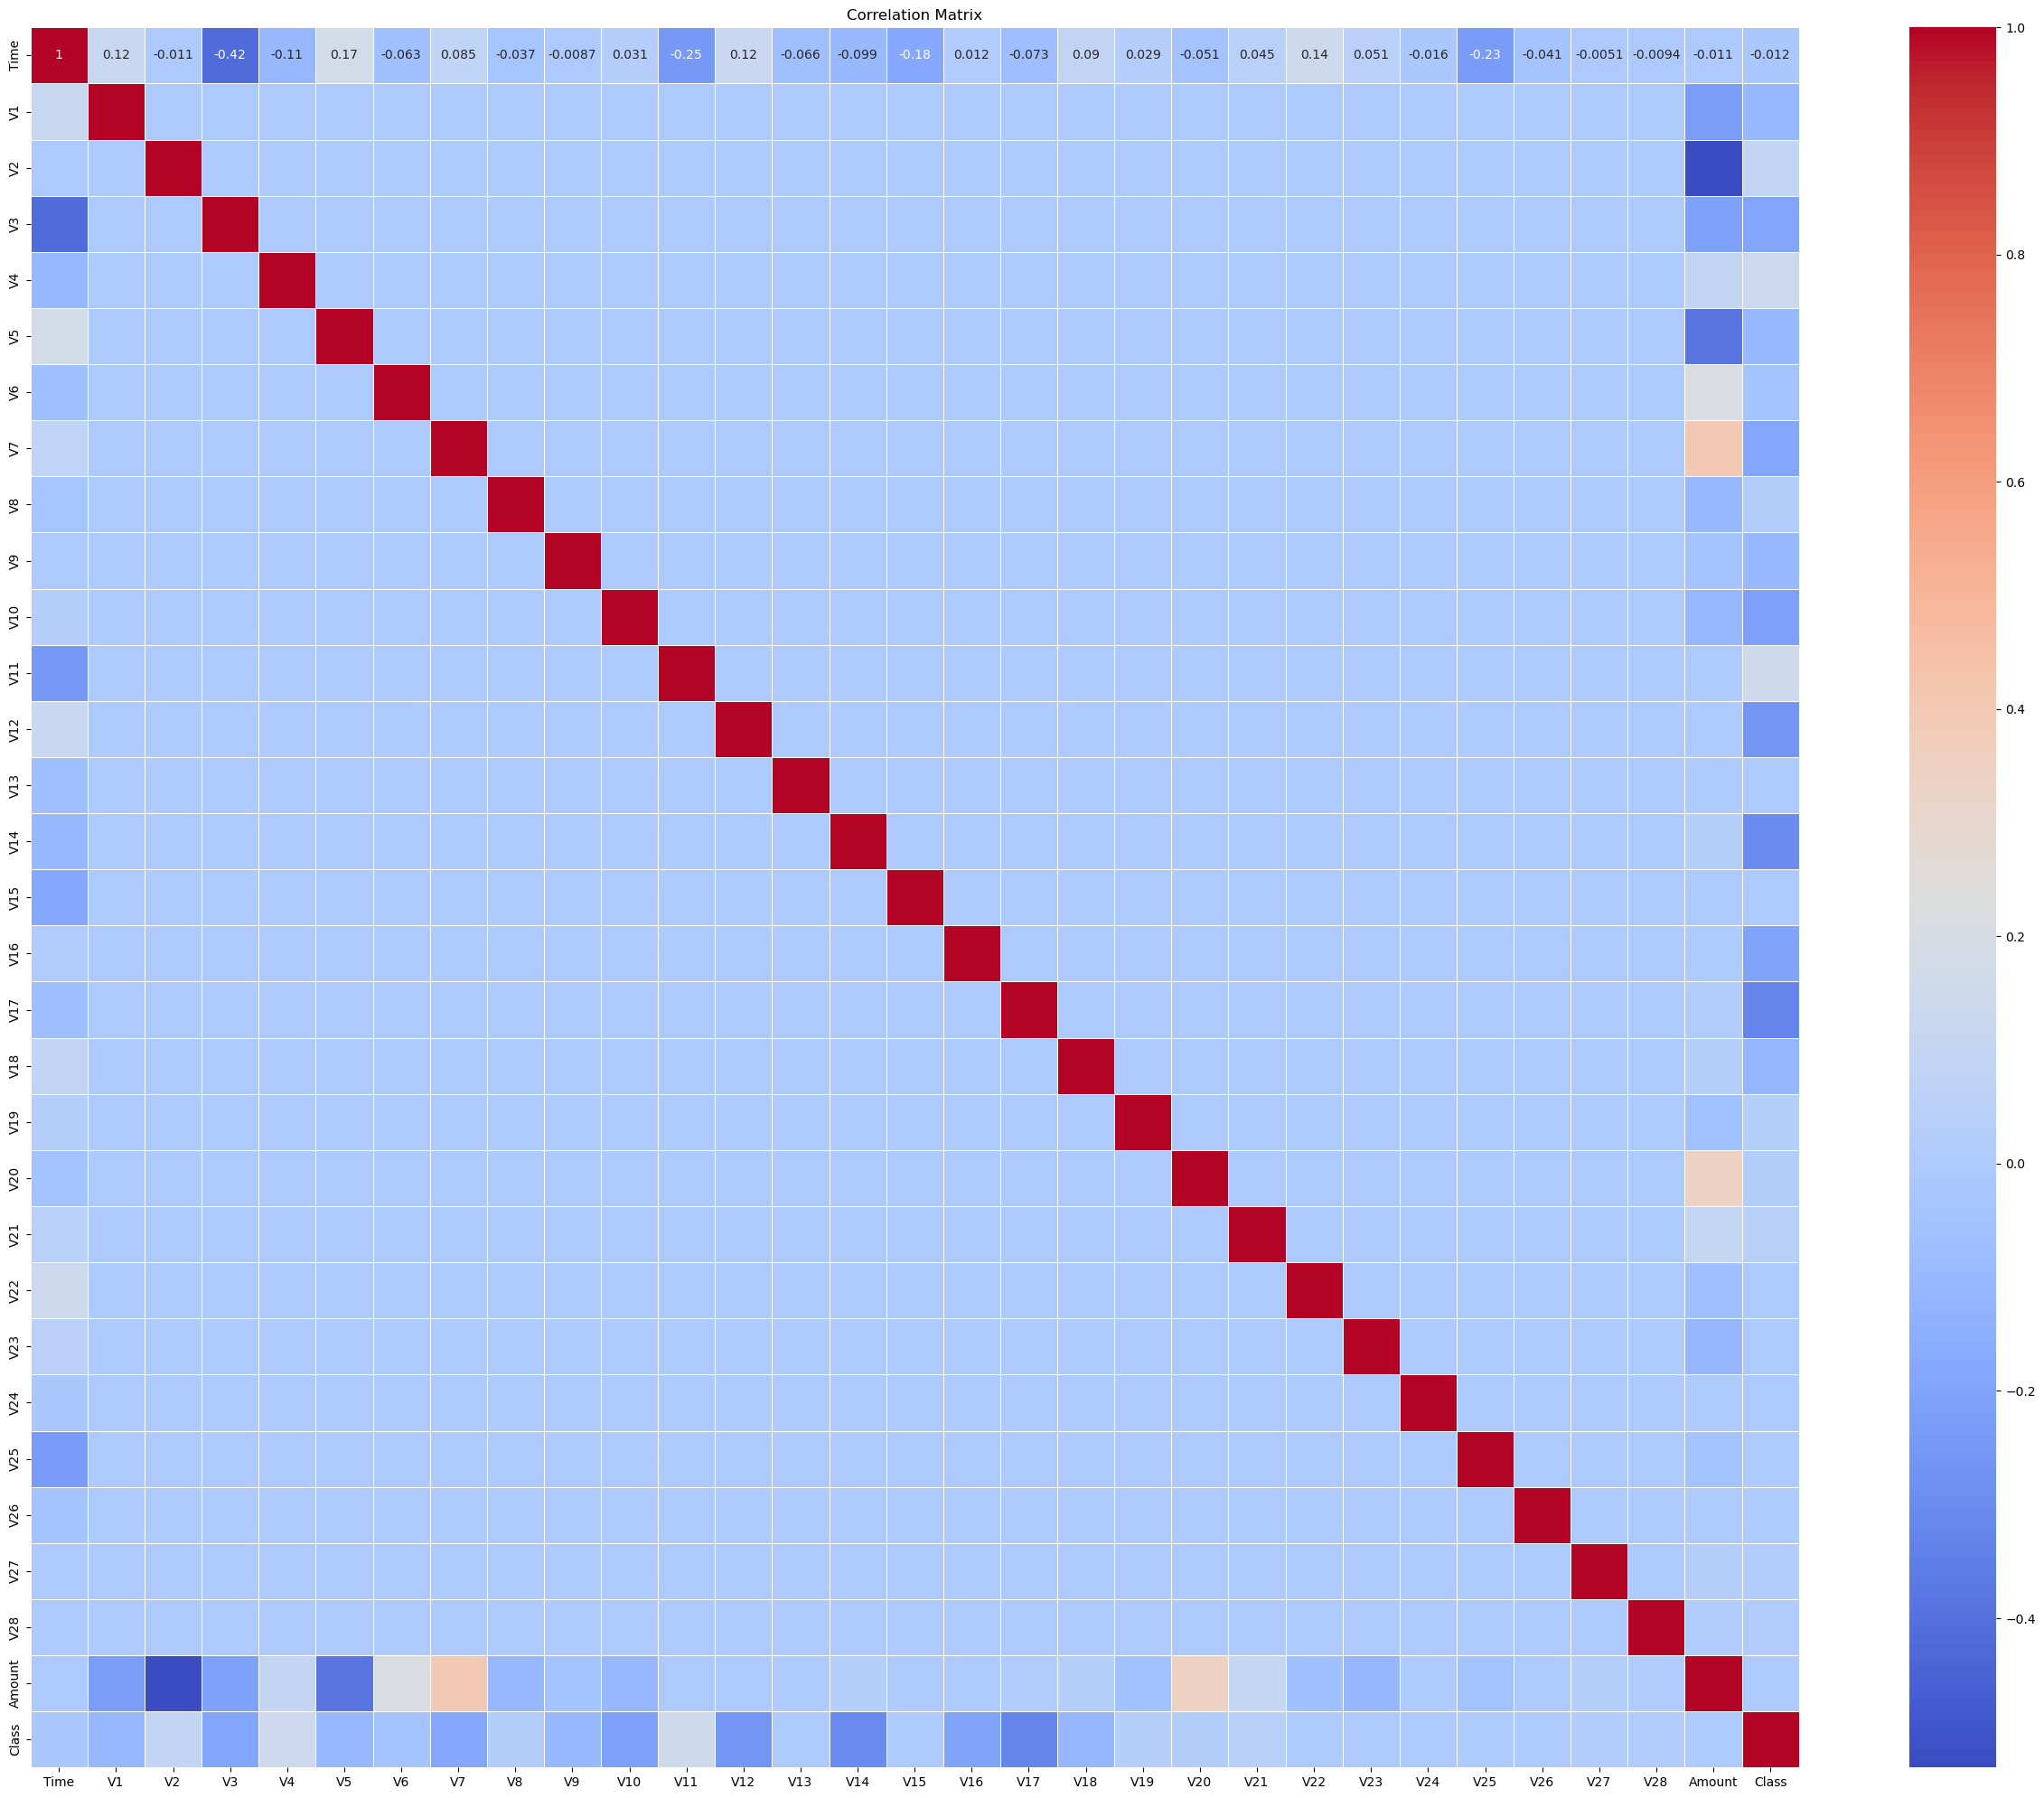

In [53]:
plt.figure(figsize=(25, 20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## 4. Splitting The Dataset into Features and Target Variables

In [54]:
# Split dataset
X = df.drop('Class', axis=1)
y = df['Class']

### 4.1 Splitting The Dataset into Train and Test Sets

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### 4.2 Feature Enginering

In [56]:
# Standardization
def Standard_Scaler (df_, col_name):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    #df.info()
    return df_

In [57]:
col_names = ['Amount']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

In [58]:
print('No Frauds in Training DataSet', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset')
print('Frauds in Training DataSet', round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset')

No Frauds in Training DataSet 99.83 % of the dataset
Frauds in Training DataSet 0.17 % of the dataset


In [59]:
print('No Frauds in Test DataSet', round(y_test.value_counts()[0]/len(y_test) * 100,2), '% of the dataset')
print('Frauds in Test DataSet', round(y_test.value_counts()[1]/len(y_test) * 100,2), '% of the dataset')

No Frauds in Test DataSet 99.83 % of the dataset
Frauds in Test DataSet 0.17 % of the dataset


### 4.3 Functions to Create the Evaluation of Models

In [60]:
def check_overfitting_underfitting(model, X_train, y_train, X_test, y_test, threshold=0.05):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"Training Score: {train_score}")
    print(f"Test Score: {test_score}")
    if abs(train_score - test_score) > threshold:
        if train_score > test_score:
            print("Potential Overfitting Detected")
        else:
            print("Potential Underfitting Detected")
    else:
        print("Model is Generalizing Well")

In [61]:
def evaluate_model(model_name, model, X_train, y_train, X_test, y_test, y_pred, y_proba):
    # Check for overfitting and underfitting
    check_overfitting_underfitting(model, X_train, y_train, X_test, y_test)
    
    # Print metrics
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("F2 Score:", fbeta_score(y_test, y_pred,beta=2))
    print("F0.5 Score:", fbeta_score(y_test, y_pred,beta=0.5))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
    
     # Determine number of subplots
    num_plots = 3
    
    # Create subplots
    fig, ax = plt.subplots(1, num_plots, figsize=(18, 6))
    
    # Confusion Matrix Heatmap
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='crest', cbar=True, 
                        xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'],ax=ax[0])
    ax[0].set_title(f"Confusion Matrix for {model_name}")
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')
    
    #Precision Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    average_precision = average_precision_score(y_test, y_proba)

    ax[1].plot(recall, precision, marker='.', label=f'Average Precision = {average_precision:.2f}')
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('Precision-Recall Curve')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    
    # ROC-AUC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc= roc_auc_score(y_test, y_proba)
    ax[2].plot(fpr, tpr, lw=2, label=f'AUC = {auc:.2f})')
    ax[2].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.05])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title(f'{model_name} - Receiver Operating Characteristic')
    ax[2].legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()

In [62]:
def learning_curves(model, model_name, X_train, y_train):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    # Learning Curve-F1
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=skf, scoring='recall', n_jobs=-1
    )
    mean_train_score = train_scores.mean(axis=1)
    mean_test_score = test_scores.mean(axis=1)
    
    ax[0].plot(train_sizes, mean_train_score, 'o-', label='Training Score')
    ax[0].plot(train_sizes, mean_test_score, 'o-', label='Cross-Validation Score')
    ax[0].set_title(f'Learning Curve using F1 for {model_name}')
    ax[0].set_xlabel('Training Size')
    ax[0].set_ylabel('F1 Score')
    ax[0].legend()
    ax[0].grid(True)
    
    # Learning Curve-Precision
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=skf, scoring='precision', n_jobs=-1
    )
    mean_train_score = train_scores.mean(axis=1)
    mean_test_score = test_scores.mean(axis=1)
    
    ax[1].plot(train_sizes, mean_train_score, 'o-', label='Training Score')
    ax[1].plot(train_sizes, mean_test_score, 'o-', label='Cross-Validation Score')
    ax[1].set_title(f'Learning Curve using Precision for {model_name}')
    ax[1].set_xlabel('Training Size')
    ax[1].set_ylabel('Precision')
    ax[1].legend()
    ax[1].grid(True)

    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=skf, scoring='recall', n_jobs=-1
    )
    mean_train_score = train_scores.mean(axis=1)
    mean_test_score = test_scores.mean(axis=1)
    
    ax[2].plot(train_sizes, mean_train_score, 'o-', label='Training Score')
    ax[2].plot(train_sizes, mean_test_score, 'o-', label='Cross-Validation Score')
    ax[2].set_title(f'Learning Curve using Recall for {model_name}')
    ax[2].set_xlabel('Training Size')
    ax[2].set_ylabel('Recall')
    ax[2].legend()
    ax[2].grid(True)

    plt.tight_layout()
    plt.show()
    
    

In [63]:
def record_metrics(name, model,X_train, y_train, X_test, y_test, y_pred, y_proba):
    metrics_dict = {
        'accuracy': [],
        'f1_score': [],
        'precision': [],
        'recall': [],
        'roc_auc': [],
        'confusion_matrix': [],
        'roc_curve': []
    }

     # Calculate and store metrics
    metrics_dict['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics_dict['f1_score'].append(f1_score(y_test, y_pred))
    metrics_dict['precision'].append(precision_score(y_test, y_pred))
    metrics_dict['recall'].append(recall_score(y_test, y_pred))
    metrics_dict['roc_auc'].append(roc_auc_score(y_test, y_proba))
    metrics_dict['confusion_matrix'].append(confusion_matrix(y_test, y_pred))
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    metrics_dict['roc_curve'].append((fpr, tpr))

    # Return the metrics dictionary
    return metrics_dict

In [64]:
all_metrics = {}

## 5. Model Selection

### 5.0 Success Metrics - Optimising for Recall

Recall: The ability of a model to find all the relevant cases within a data set. The number of true positives divided by the number of true positives plus the number of false negatives.

In most high-risk detection cases (like cancer), recall is a more important evaluation metric than precision.

In the case of credit card fraud detection, we want to avoid false negatives as much as possible. Fraud transactions cost us a lot and thus we want to take appropriate measures to prevent them. A false negative case means that a fraud-positive transaction is assessed to genuine transaction, which is detrimental. In this use case, false positives (a genuine transaction as fraud-positive) are not as important as preventing a fraud.

### 5.1 Logistics Regression

Training Score: 0.9990068417567866
Test Score: 0.9990871107053826
Model is Generalizing Well
Model: Logistic Regression
Accuracy: 0.9990871107053826
F1 Score: 0.7272727272727273
F2 Score: 0.7123287671232877
F0.5 Score: 0.7428571428571428
Precision: 0.7536231884057971
Recall: 0.7027027027027027
ROC-AUC Score: 0.9121254850019724


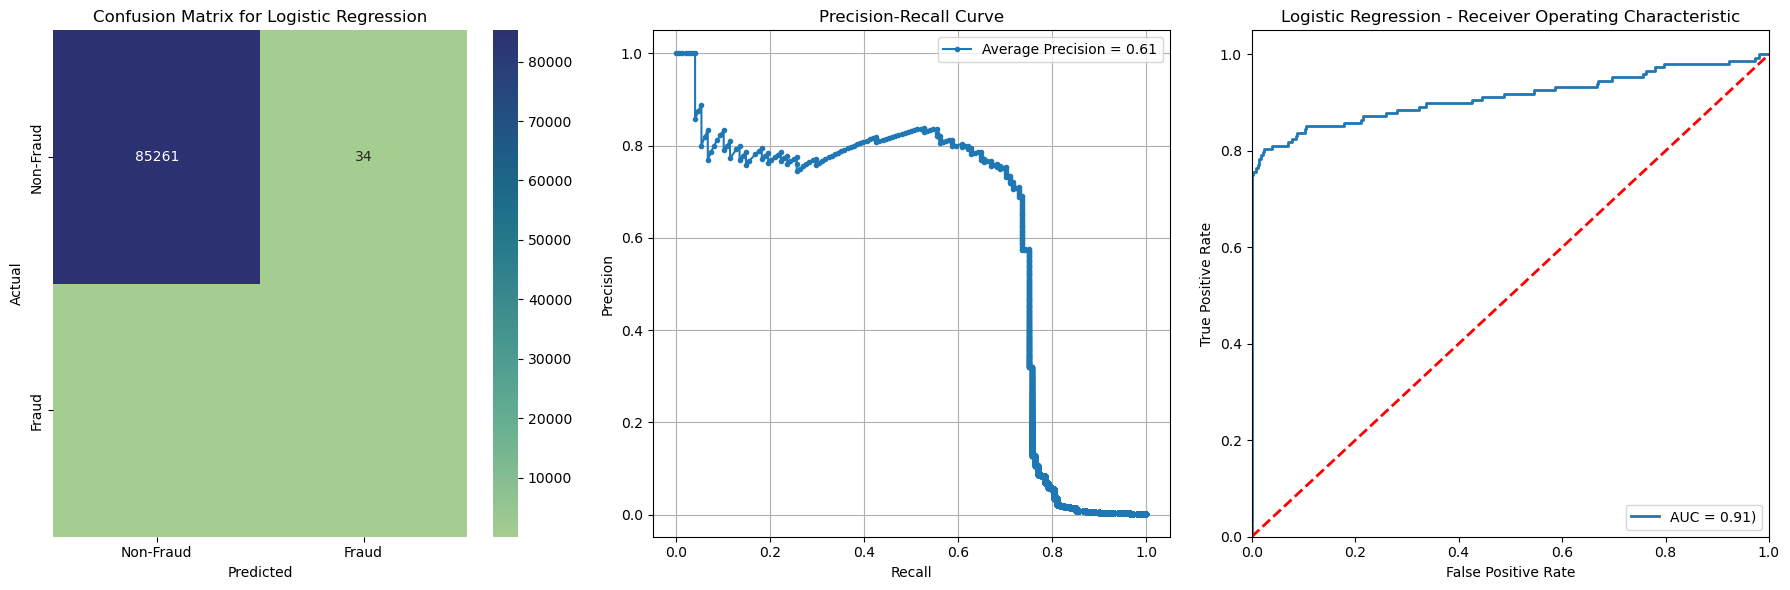

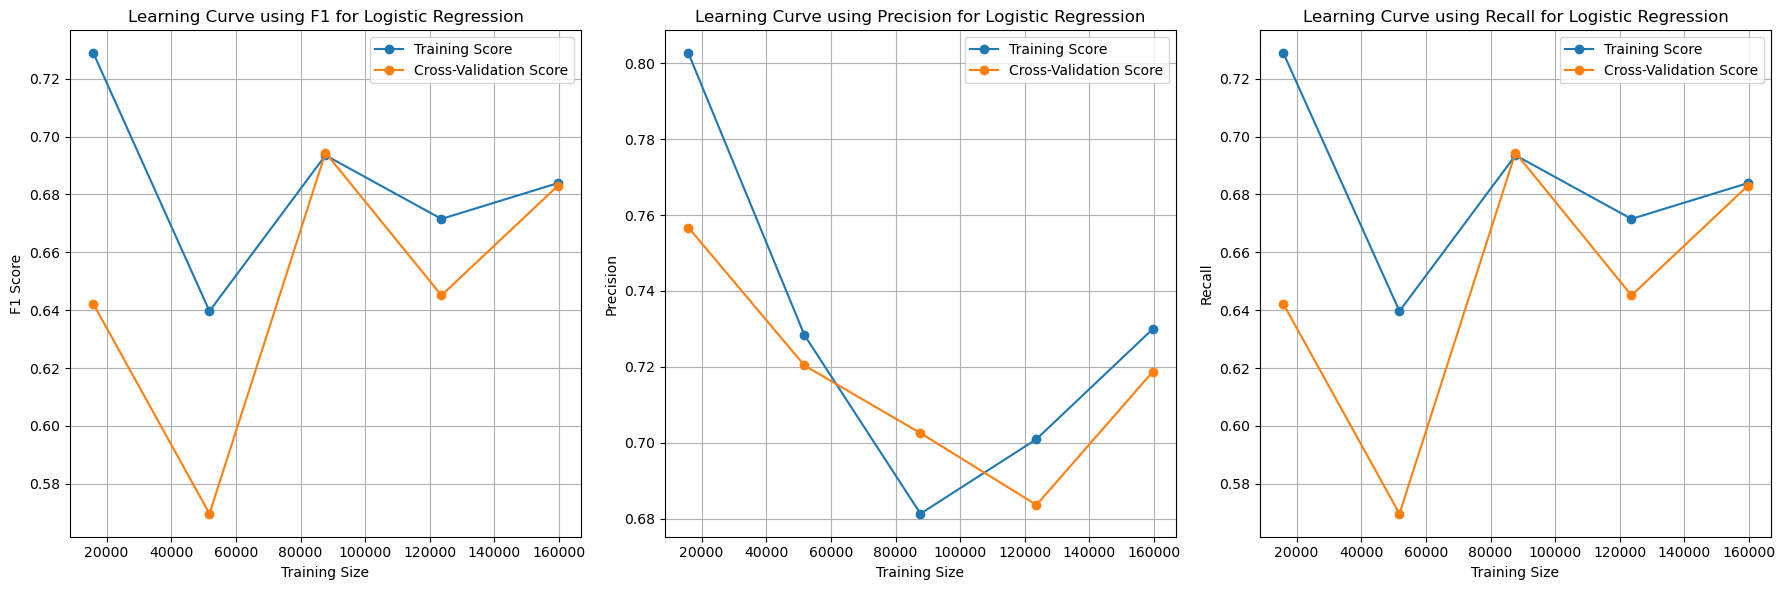

In [67]:
# Logistic Regression without sampling
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
evaluate_model("Logistic Regression", lr_model, X_train, y_train, X_test, y_test, y_pred_lr,y_proba_lr)
learning_curves(lr_model, "Logistic Regression", X_train, y_train)
all_metrics['Logistic Regression'] = record_metrics('Logistic Regression', lr_model, X_train, y_train, X_test, y_test, y_pred_lr,y_proba_lr)

The Model is Underfitting based of F1, Recall and Precission for the Most Parts with increase in Training Size

The Classification Model has a good recall score it can be expected to improve after providing additional data to the model

### 5.2 Decision Tree Classifier

Training Score: 1.0
Test Score: 0.9991807403766253
Model is Generalizing Well
Model: Decision Tree
Accuracy: 0.9991807403766253
F1 Score: 0.7569444444444445
F2 Score: 0.744535519125683
F0.5 Score: 0.769774011299435
Precision: 0.7785714285714286
Recall: 0.7364864864864865
ROC-AUC Score: 0.8680615209851976


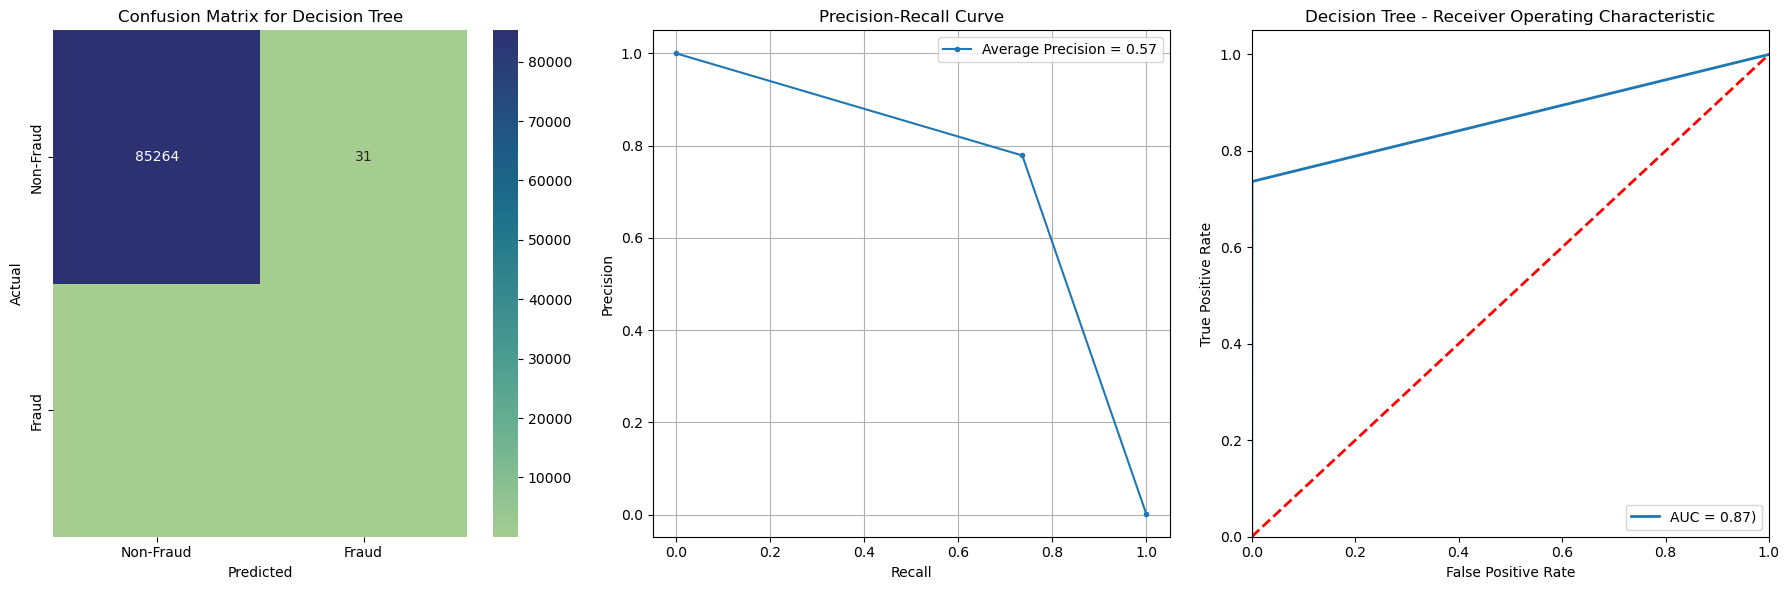

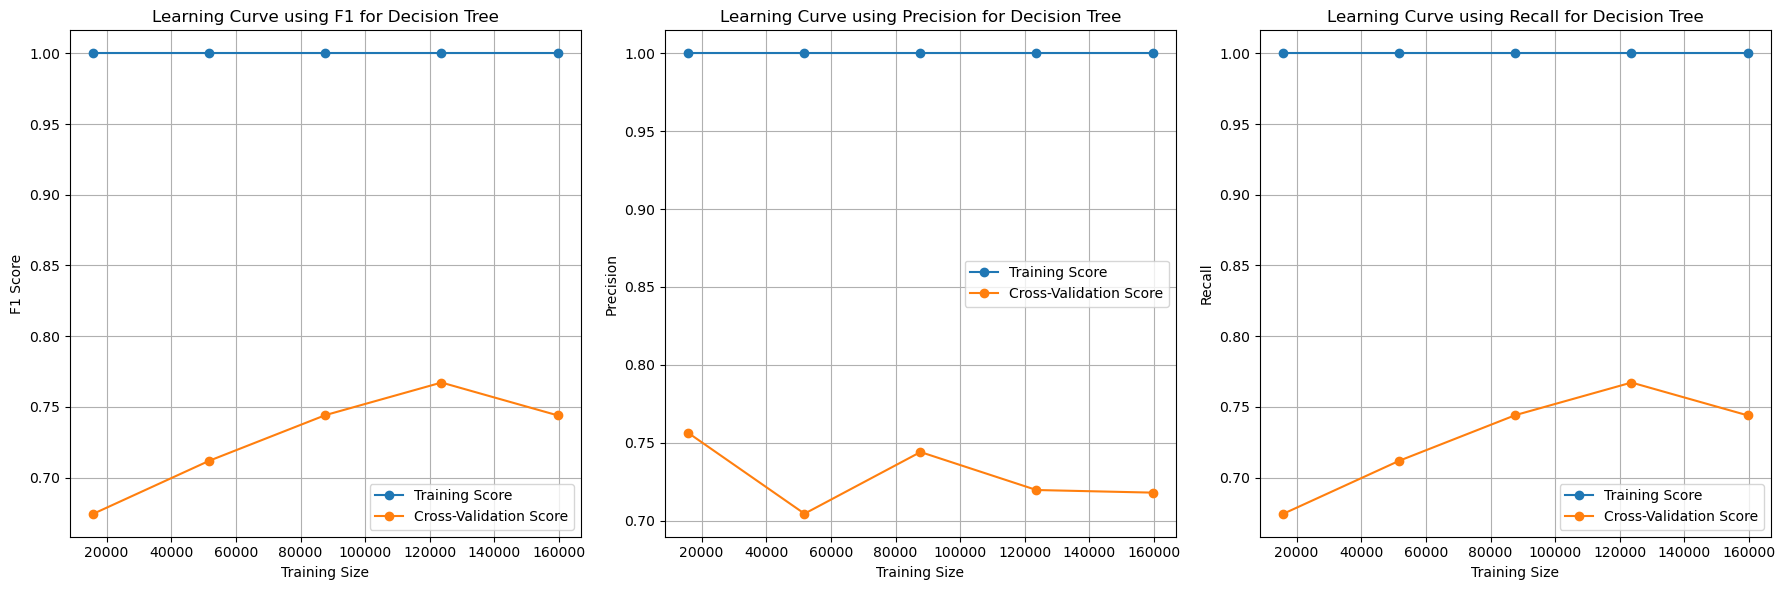

In [78]:
# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
y_proba_dt = decision_tree_model.predict_proba(X_test)[:, 1]
evaluate_model("Decision Tree", decision_tree_model, X_train, y_train, X_test, y_test, y_pred_dt,y_proba_dt)
learning_curves(decision_tree_model, "Decision Tree", X_train, y_train)
all_metrics['Decision Tree'] = record_metrics('Decision Tree', decision_tree_model, X_train, y_train, X_test, y_test, y_pred_dt,y_proba_dt)

The Model is Severely Underfitting based of F1, Recall and Precission as the Trianing Score Increases

The Classification Model has a good recall score it can be expected to improve after providing additional data to the model

FurtherMore the Average Precision-Recall is less than 0.57 which is very poor performance for a classifier 

### 5.3 eXtreme Gradient Boosting (XGB)

Training Score: 0.9997391705623884
Test Score: 0.9995201479348805
Model is Generalizing Well
Model: eXtreme Gradient Boosting (XGB)
Accuracy: 0.9995201479348805
F1 Score: 0.8429118773946359
F2 Score: 0.7801418439716313
F0.5 Score: 0.9166666666666666
Precision: 0.9734513274336283
Recall: 0.7432432432432432
ROC-AUC Score: 0.9548920043790787


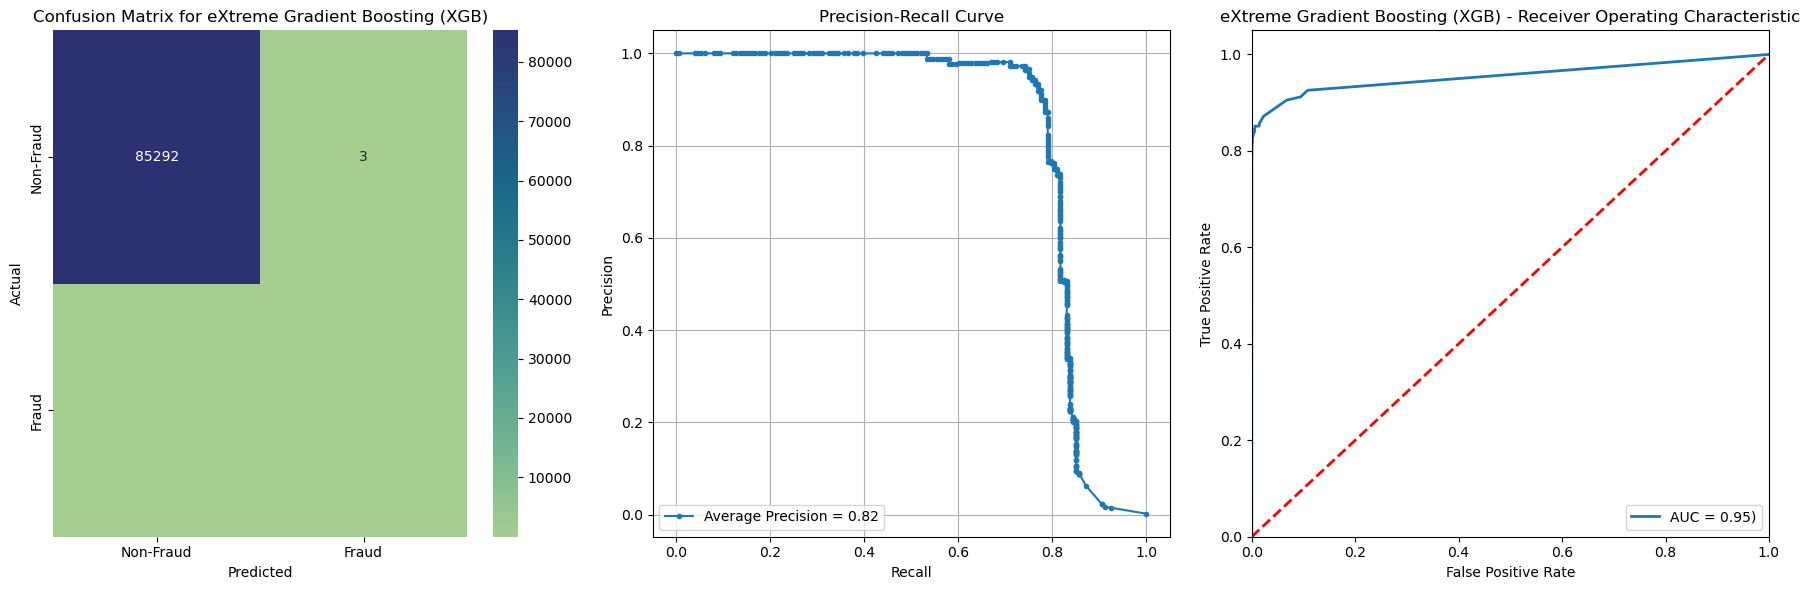

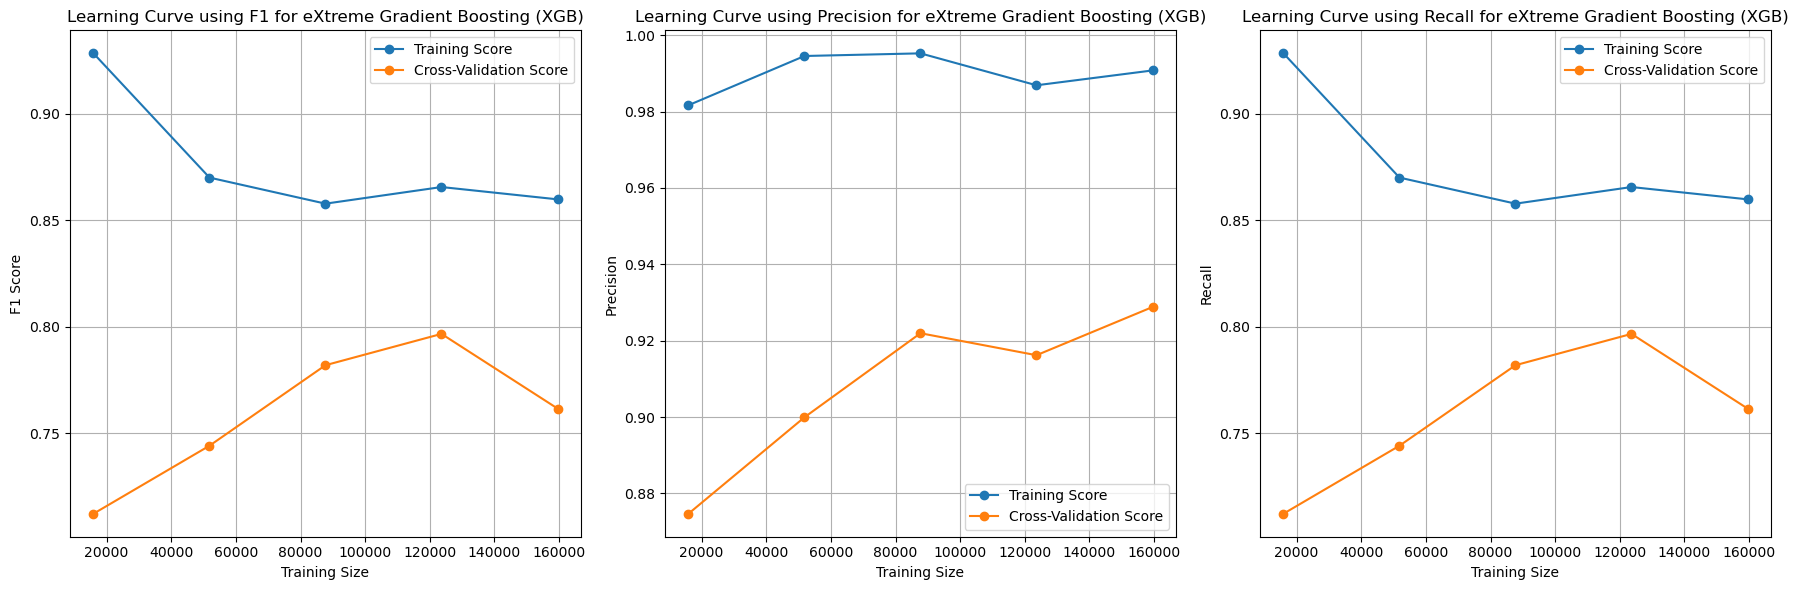

In [79]:
# eXtreme Gradient Boosting (XGB)
xgb_model = XGBClassifier(n_estimators=10)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
evaluate_model("eXtreme Gradient Boosting (XGB)", xgb_model, X_train, y_train, X_test, y_test, y_pred_xgb,y_proba_xgb)
learning_curves(xgb_model, "eXtreme Gradient Boosting (XGB)", X_train, y_train)
all_metrics['eXtreme Gradient Boosting (XGB)'] = record_metrics('eXtreme Gradient Boosting (XGB)', xgb_model, X_train, y_train, X_test, y_test, y_pred_xgb, y_proba_xgb)

The Model is Severely Underfitting based of F1, Recall and Precission, as the Trianing Score Increases model keeps converging indicating a possible improvement with addition of data

The Classification Model has a good recall score it can be expected to improve after providing additional data to the modelTde the Average Precision-Recallmoreless tha820.57 which is vgoodpoor performance for a classi with respect to anamoly detection
Additionally the AUC Score is o.95 indicating a good performance with respect to Fitting of Data with Test Setsfier

## 6. Oversmapling

## 6.1 Synthetic Minority Over-sampling TEchnique (SMOTE)

SMOTE (Synthetic Minority Oversampling Technique) synthesize elements for the minority class. 

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [80]:
#SMOTE
smote = SMOTE(sampling_strategy='minority',random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('No Frauds after SMOTE in DataSet is',y_train_smote.value_counts()[0],":",round(y_train_smote.value_counts()[0]/len(y_train_smote) * 100,2), '% of the dataset')
print('Frauds after SMOTE in DataSet is', y_train_smote.value_counts()[1],":",round(y_train_smote.value_counts()[1]/len(y_train_smote) * 100,2), '% of the dataset')

No Frauds after SMOTE in DataSet is 199020 : 50.0 % of the dataset
Frauds after SMOTE in DataSet is 199020 : 50.0 % of the dataset


### 6.1.1 Logistic Regression with SMOTE

Training Score: 0.9745301979700532
Test Score: 0.9797174724670248
Model is Generalizing Well
Model: Logistic Regression with SMOTE
Accuracy: 0.9797174724670248
F1 Score: 0.12783090085556115
F2 Score: 0.26120937885643775
F0.5 Score: 0.08462153518123669
Precision: 0.06905927134312126
Recall: 0.8581081081081081
ROC-AUC Score: 0.9447528688193441


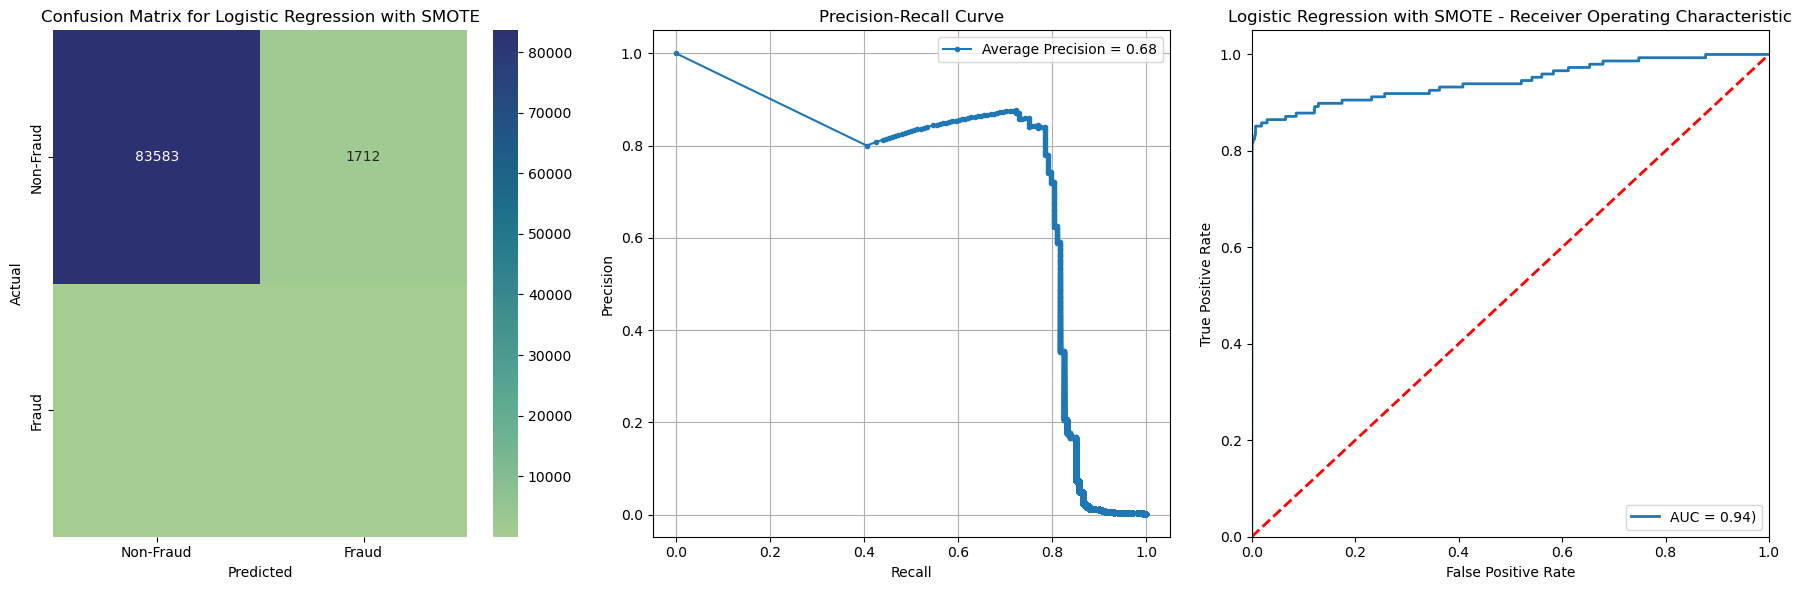

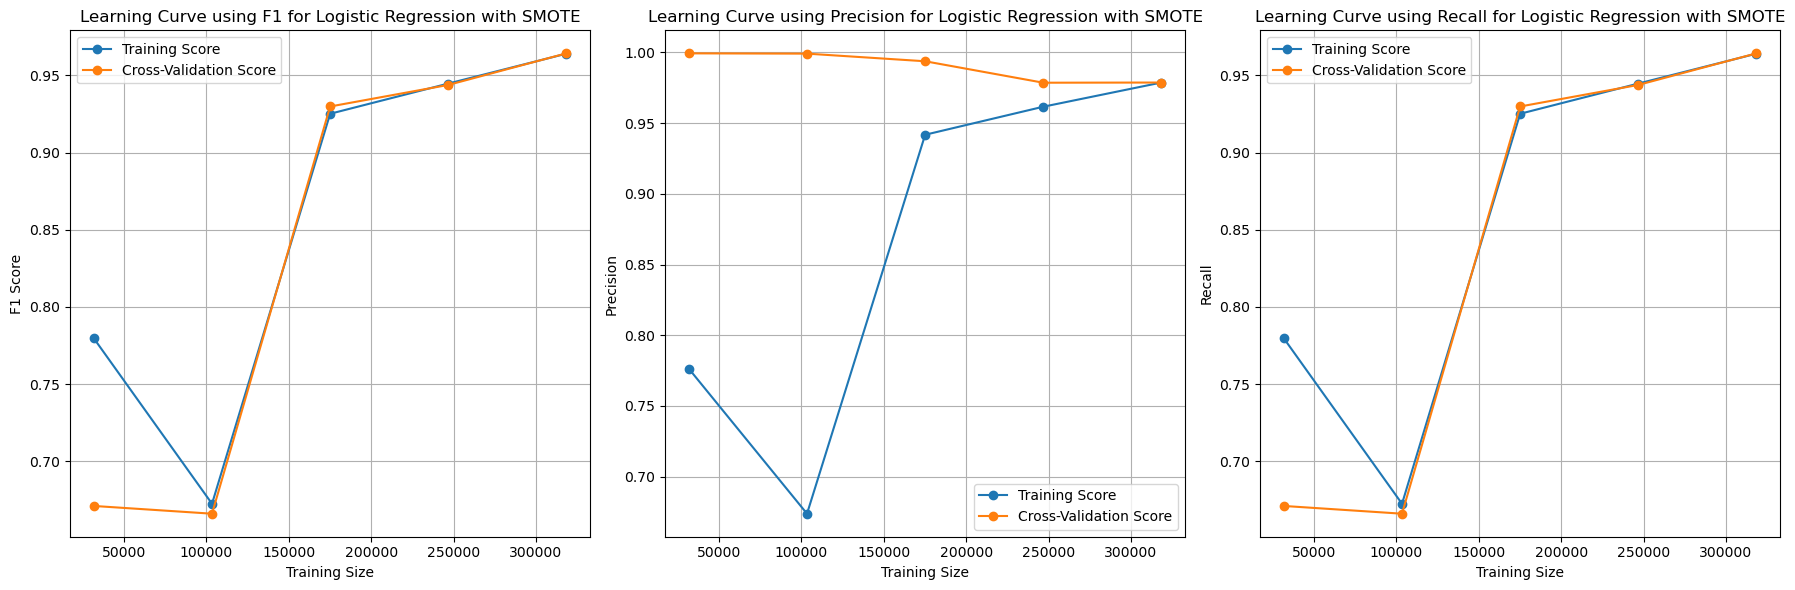

In [81]:
# Logistic Regression with SMOTE
lr_model_smote = LogisticRegression(random_state=42)
lr_model_smote.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr_model_smote.predict(X_test)
y_proba_lr_smote = lr_model_smote.predict_proba(X_test)[:, 1]
evaluate_model("Logistic Regression with SMOTE", lr_model_smote, X_train_smote, y_train_smote, X_test, y_test, y_pred_lr_smote, y_proba_lr_smote)
learning_curves(lr_model_smote, "Logistic Regression with SMOTE", X_train_smote, y_train_smote)
all_metrics['Logistic Regression with SMOTE'] = record_metrics('Logistic Regression with SMOTE', lr_model_smote, X_train_smote, y_train_smote, X_test, y_test, y_pred_lr_smote, y_proba_lr_smote)

After OverSampling using SMOTE Technique we Observe a Good Fit with respect to F1 score and Recall

However With respect to Precision there is Overfitting with increase in Training Size

Furthermore Average-Precision and Recall Score is observed to be under 0.68 which shows improvement but with respect to anamoly detection its is still underperforming

### 6.1.2 Decision Tree SMOTE

Training Score: 1.0
Test Score: 0.9977528878901724
Model is Generalizing Well
Model: Decision Tree
Accuracy: 0.9977528878901724
F1 Score: 0.5317073170731708
F2 Score: 0.6381733021077283
F0.5 Score: 0.45568561872909696
Precision: 0.41603053435114506
Recall: 0.7364864864864865
ROC-AUC Score: 0.8673463559696633


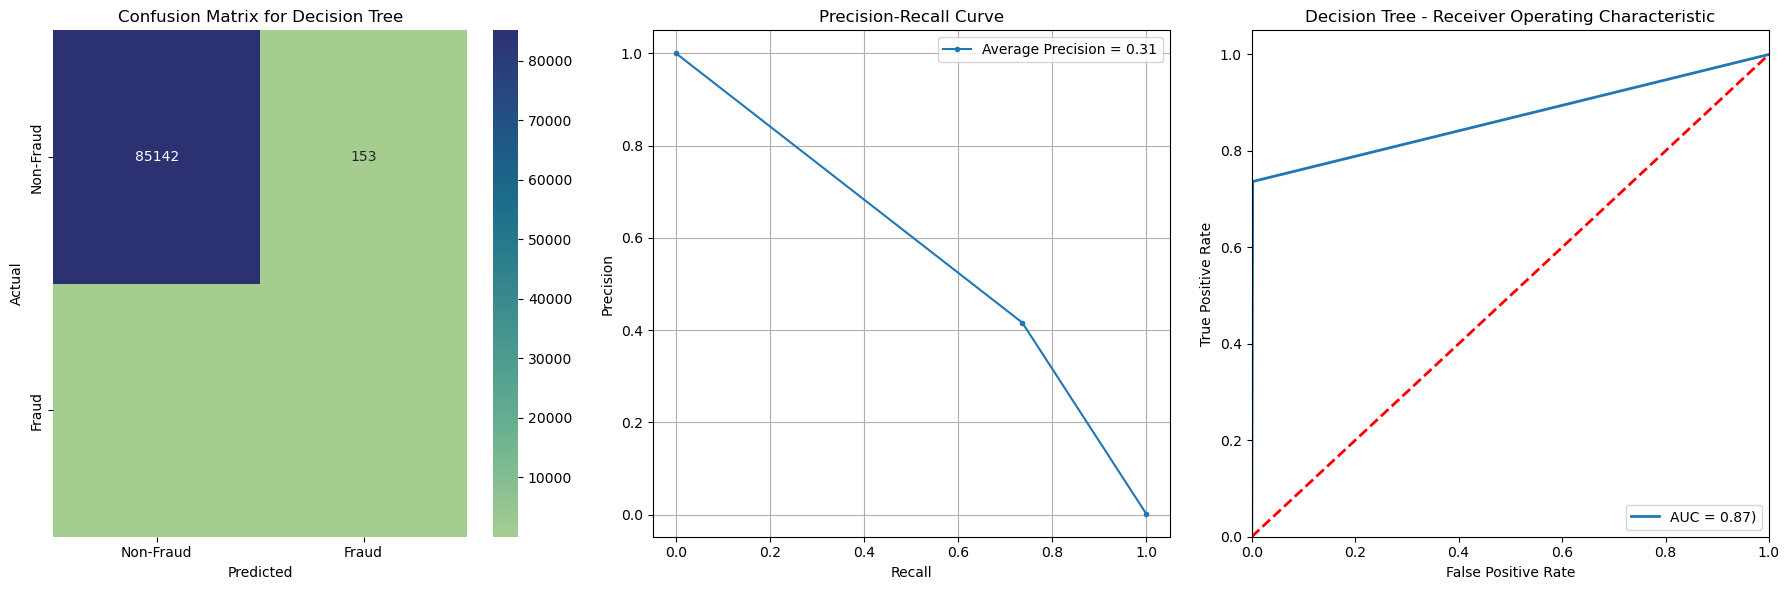

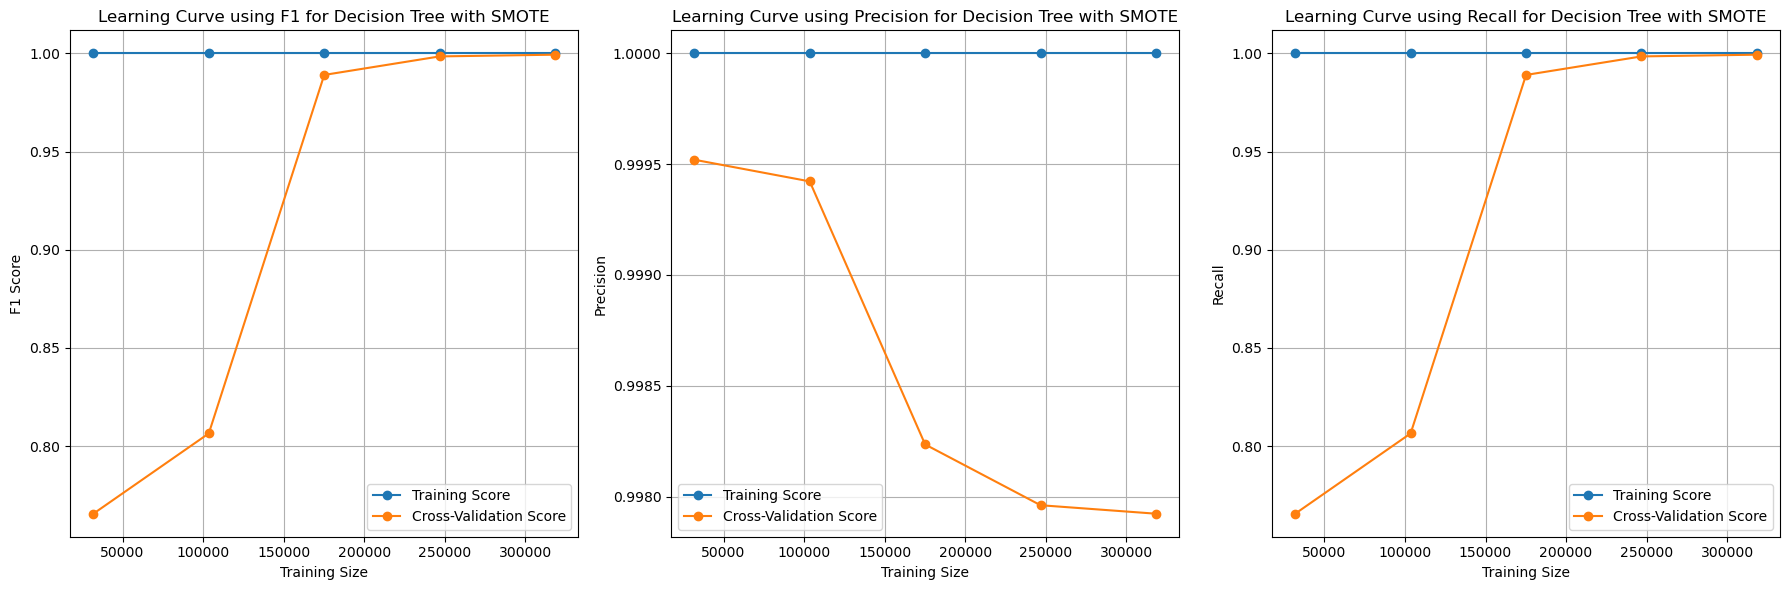

In [82]:
# Decision Tree SMOTE
dt_model_smote = DecisionTreeClassifier(random_state=42)
dt_model_smote.fit(X_train_smote, y_train_smote)
y_pred_dt_smote = dt_model_smote.predict(X_test)
y_proba_dt_smote = dt_model_smote.predict_proba(X_test)[:, 1]
evaluate_model("Decision Tree with SMOTE", dt_model_smote, X_train_smote, y_train_smote, X_test, y_test, y_pred_dt_smote,y_proba_dt_smote)
learning_curves(dt_model, "Decision Tree with SMOTE", X_train_smote, y_train_smote)
all_metrics['Decision Tree with SMOTE'] = record_metrics('Decision Tree with SMOTE', dt_model_smote, X_train_smote, y_train_smote, X_test, y_test, y_pred_dt_smote,y_proba_dt_smote)

The Model is Severely Underfitting after Oversampling with SMOTE based of F1, Recall and Precission as the Trianing Score Increases 

The Classification Model still has has a good recall score but it is still showing underfitting for small training sizes

FurtherMore the Average Precision-Recall is less than 0.31 which is very poor performance for a classifier after Oversampling the Datasets

### 6.1.3 eXtreme Gradient Boosting (XGB) with SMOTE

Training Score: 0.9946186312933374
Test Score: 0.9940194047493651
Model is Generalizing Well
Model: eXtreme Gradient Boosting (XGB)
Accuracy: 0.9940194047493651
F1 Score: 0.32851511169513803
F2 Score: 0.5186721991701244
F0.5 Score: 0.24038461538461536
Precision: 0.2039151712887439
Recall: 0.8445945945945946
ROC-AUC Score: 0.9519814380298584


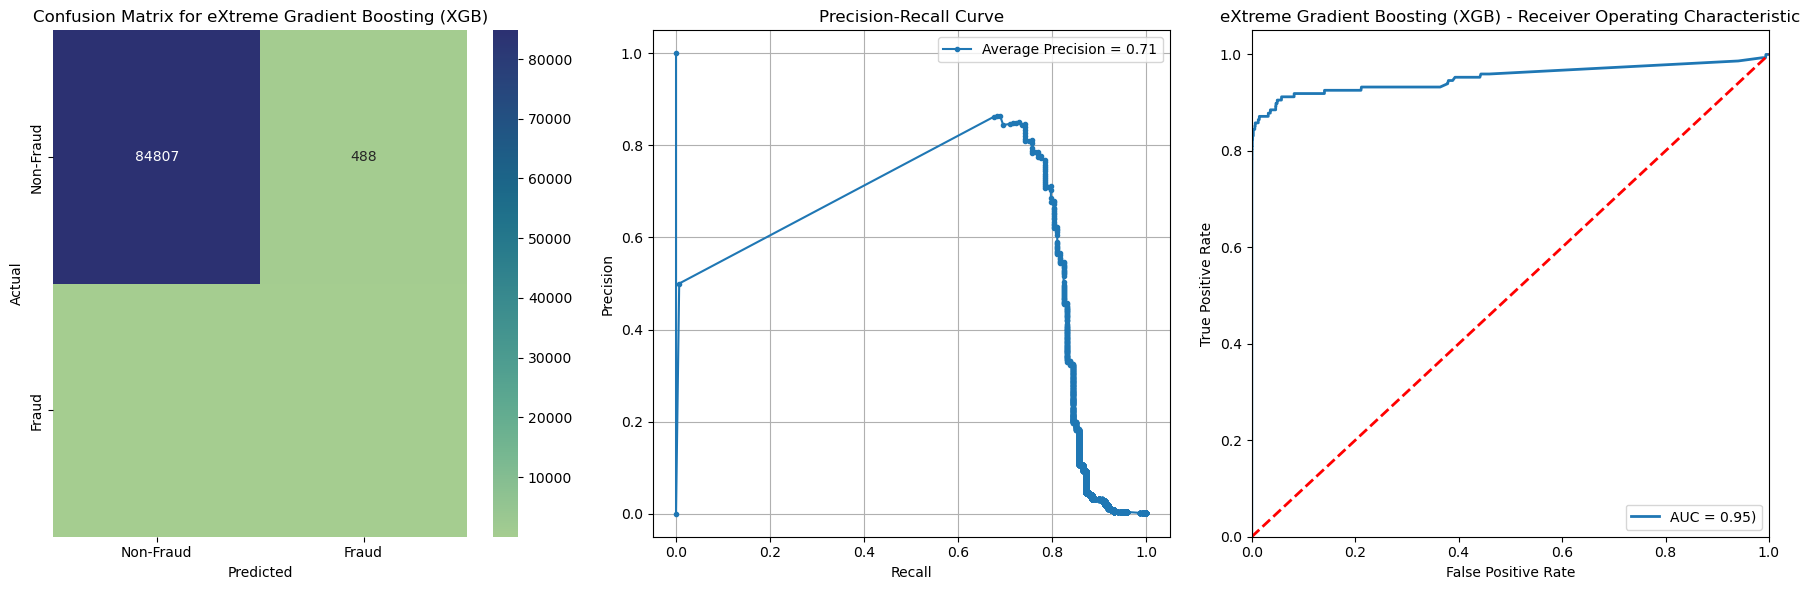

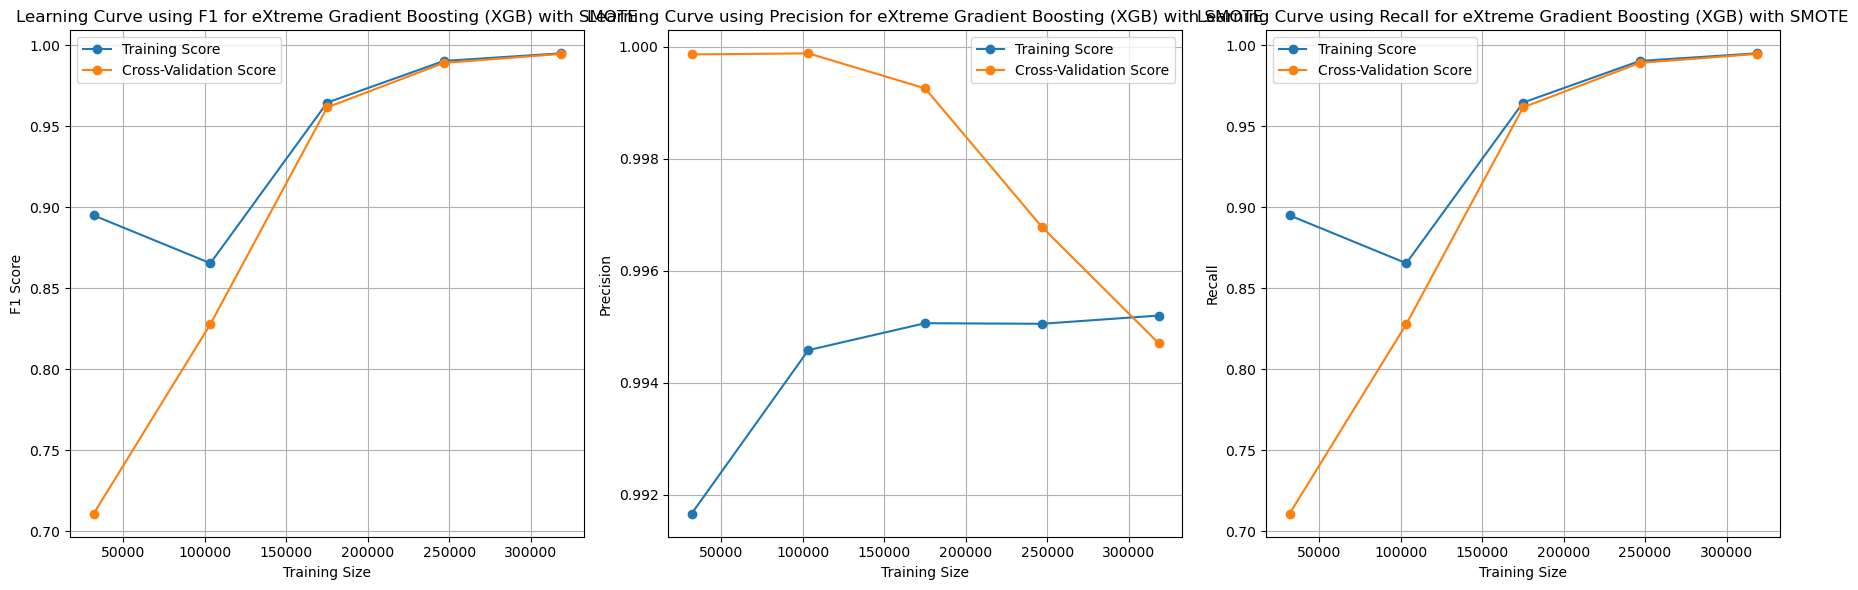

In [83]:
# eXtreme Gradient Boosting (XGB) SMOTE
xgb_model_smote = XGBClassifier(n_estimators=10)
xgb_model_smote.fit(X_train_smote, y_train_smote)
y_pred_xgb_smote = xgb_model_smote.predict(X_test)
y_proba_xgb_smote = xgb_model_smote.predict_proba(X_test)[:, 1]
evaluate_model("eXtreme Gradient Boosting (XGB) with SMOTE", xgb_model_smote, X_train_smote, y_train_smote, X_test, y_test, y_pred_xgb_smote,y_proba_xgb_smote)
learning_curves(xgb_model, "eXtreme Gradient Boosting (XGB) with SMOTE", X_train_smote, y_train_smote)
all_metrics['eXtreme Gradient Boosting (XGB) with SMOTE'] = record_metrics('eXtreme Gradient Boosting (XGB) with SMOTE', xgb_model_smote, X_train_smote, y_train_smote, X_test, y_test, y_pred_xgb_smote,y_proba_xgb_smote)

After Oversampling using the SMOTE Techniques Model is showing severe underfitting and Low Precision and Recall Scores

Furthermore the Average Precision-Recall Score is decresed indicating not a good performance with Oversampled data

## 6.2 Balancing Data using SMOTE-Tomek links

A combination of over-sampling the minority (abnormal) class and under-sampling the majority (normal) class can achieve better classifier performance than only under-sampling the majority class. This method was first introduced by Batista et al. (2003).

The process of SMOTE-Tomek Links is as follows.

1. Start of SMOTE: choose random data from the minority class.
2. Calculate the distance between the random data and its k nearest neighbors.
3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
4. Repeat step number 2–3 until the desired proportion of minority class is met (End of SMOTE).
5. Start of Tomek Links: choose random data from the majority class.
6. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.

In [84]:
smote_tomek = SMOTETomek(sampling_strategy='minority',random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
print('No Frauds after SMOTETomek in DataSet is',y_train_smote_tomek.value_counts()[0],round(y_train_smote_tomek.value_counts()[0]/len(y_train_smote_tomek) * 100,2), '% of the dataset')
print('Frauds after SMOTETomek in DataSet is', y_train_smote_tomek.value_counts()[1], round(y_train_smote_tomek.value_counts()[1]/len(y_train_smote_tomek) * 100,2), '% of the dataset')

No Frauds after SMOTETomek in DataSet is 198430 50.0 % of the dataset
Frauds after SMOTETomek in DataSet is 198430 50.0 % of the dataset


### 6.2.2 Logistic Regression with SMOTE-Tomek

Training Score: 0.9761931159602882
Test Score: 0.9829945109605234
Model is Generalizing Well
Model: Logistic Regression with SMOTETomek
Accuracy: 0.9829945109605234
F1 Score: 0.14979520187244003
F2 Score: 0.29725963771481656
F0.5 Score: 0.10012515644555695
Precision: 0.08199871877001921
Recall: 0.8648648648648649
ROC-AUC Score: 0.95534555746907


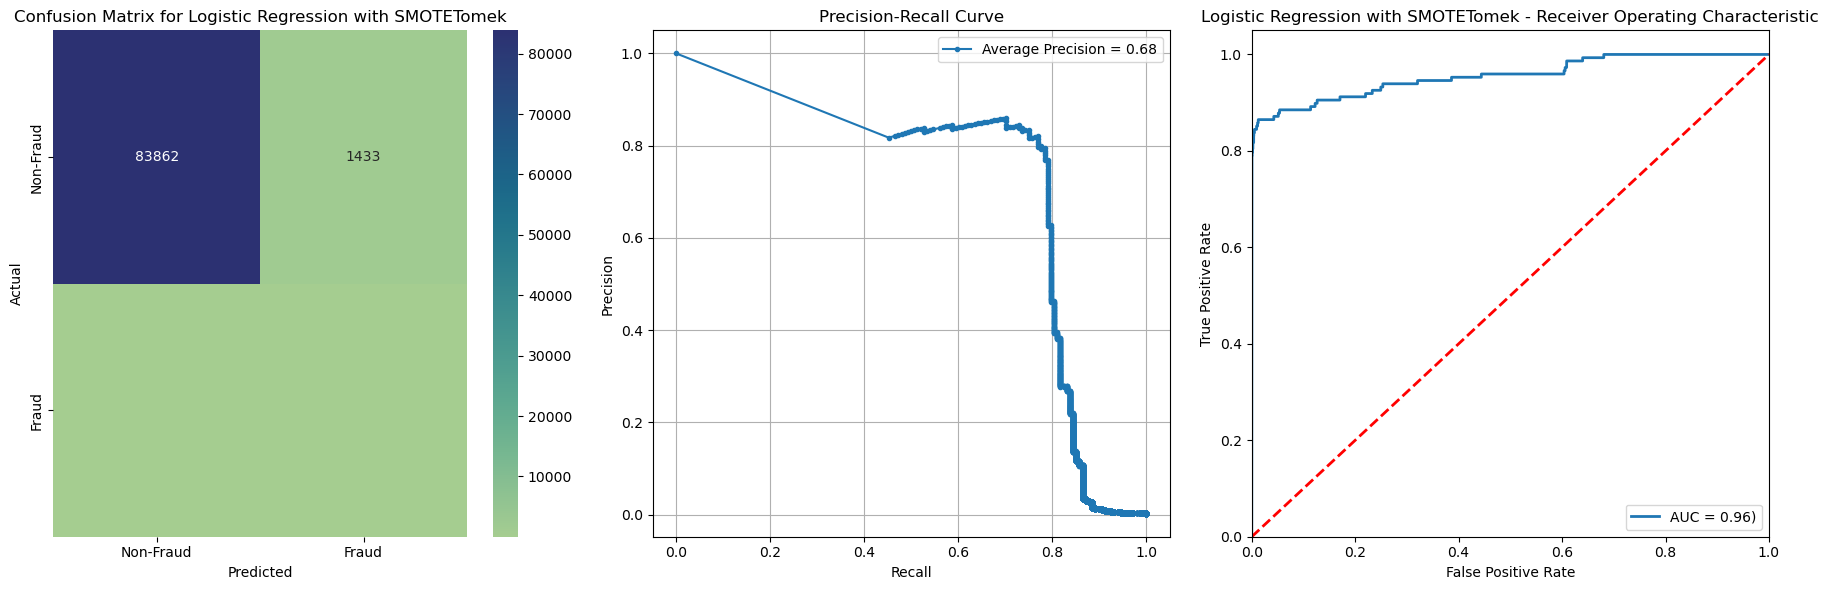

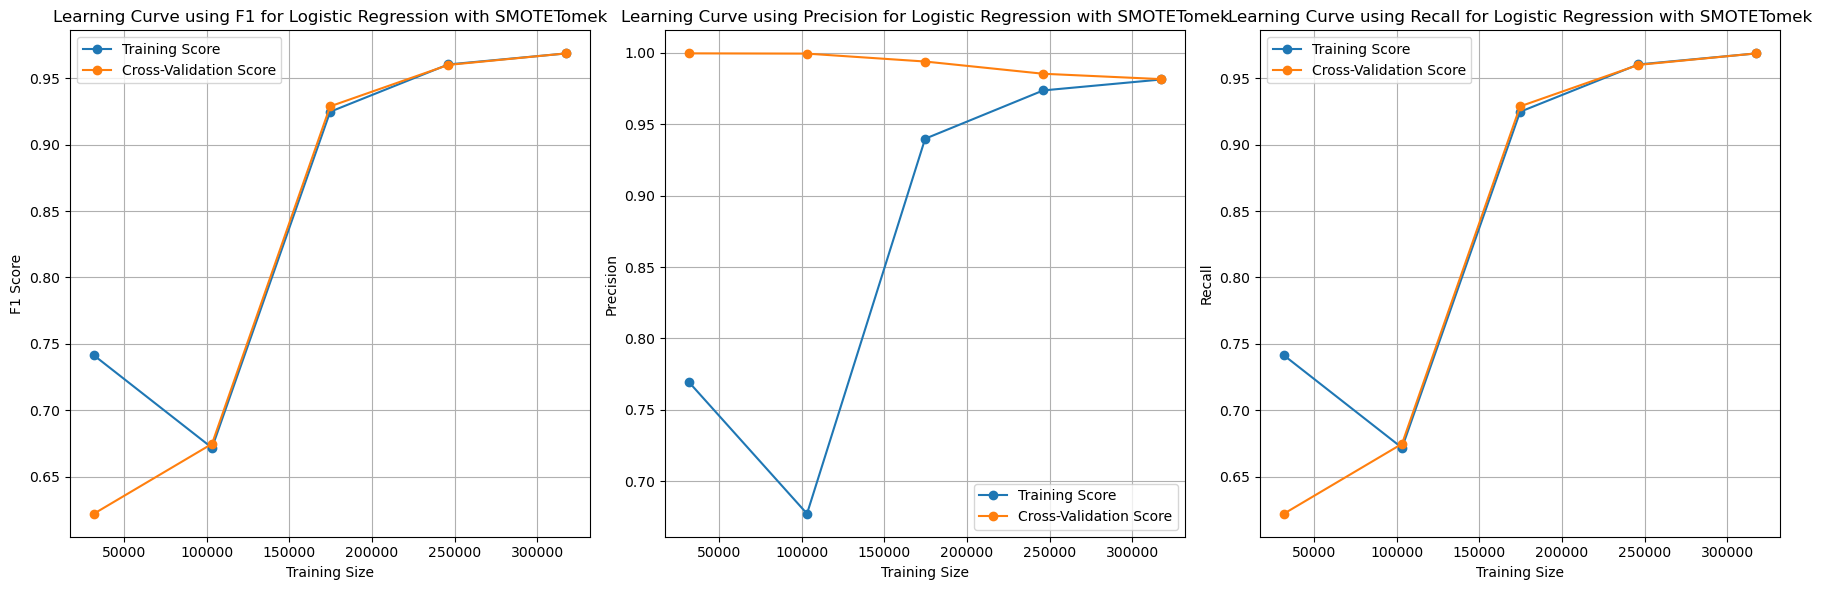

In [87]:
# Logistic Regression with SMOTE-Tomek
lr_model_smote_tomek = LogisticRegression(random_state=42)
lr_model_smote_tomek.fit(X_train_smote_tomek, y_train_smote_tomek)
y_pred_lr_smote_tomek = lr_model_smote_tomek.predict(X_test)
y_proba_lr_smote_tomek = lr_model_smote_tomek.predict_proba(X_test)[:, 1]
evaluate_model("Logistic Regression with SMOTETomek", lr_model_smote_tomek, X_train_smote_tomek, y_train_smote_tomek, X_test, y_test, y_pred_lr_smote_tomek, y_proba_lr_smote_tomek)
learning_curves(lr_model_smote_tomek, "Logistic Regression with SMOTETomek", X_train_smote_tomek, y_train_smote_tomek)
all_metrics['Logistic Regression with SMOTETomek'] = record_metrics('Logistic Regression with SMOTETomek',lr_model_smote_tomek,X_train_smote_tomek, y_train_smote_tomek, X_test, y_test, y_pred_lr_smote_tomek, y_proba_lr_smote_tomek)

After Sampling using SMOTE-Tomek Technique we Observe a Good Fit with respect to F1 score and Recall

However With respect to Precision there is Overfitting with increase in Training Size

Furthermore Average-Precision and Recall Score is observed to be under 0.68 which shows no improvement with Oversampling with SMOTE it is not performing well anamoly detection its is still underperforming

Training Score: 1.0
Test Score: 0.9977762953079831
Model is Generalizing Well
Model: Decision Tree with SMOTETomek
Accuracy: 0.9977762953079831
F1 Score: 0.5343137254901961
F2 Score: 0.6396713615023474
F0.5 Score: 0.4587542087542088
Precision: 0.41923076923076924
Recall: 0.7364864864864865
ROC-AUC Score: 0.8673580799863113


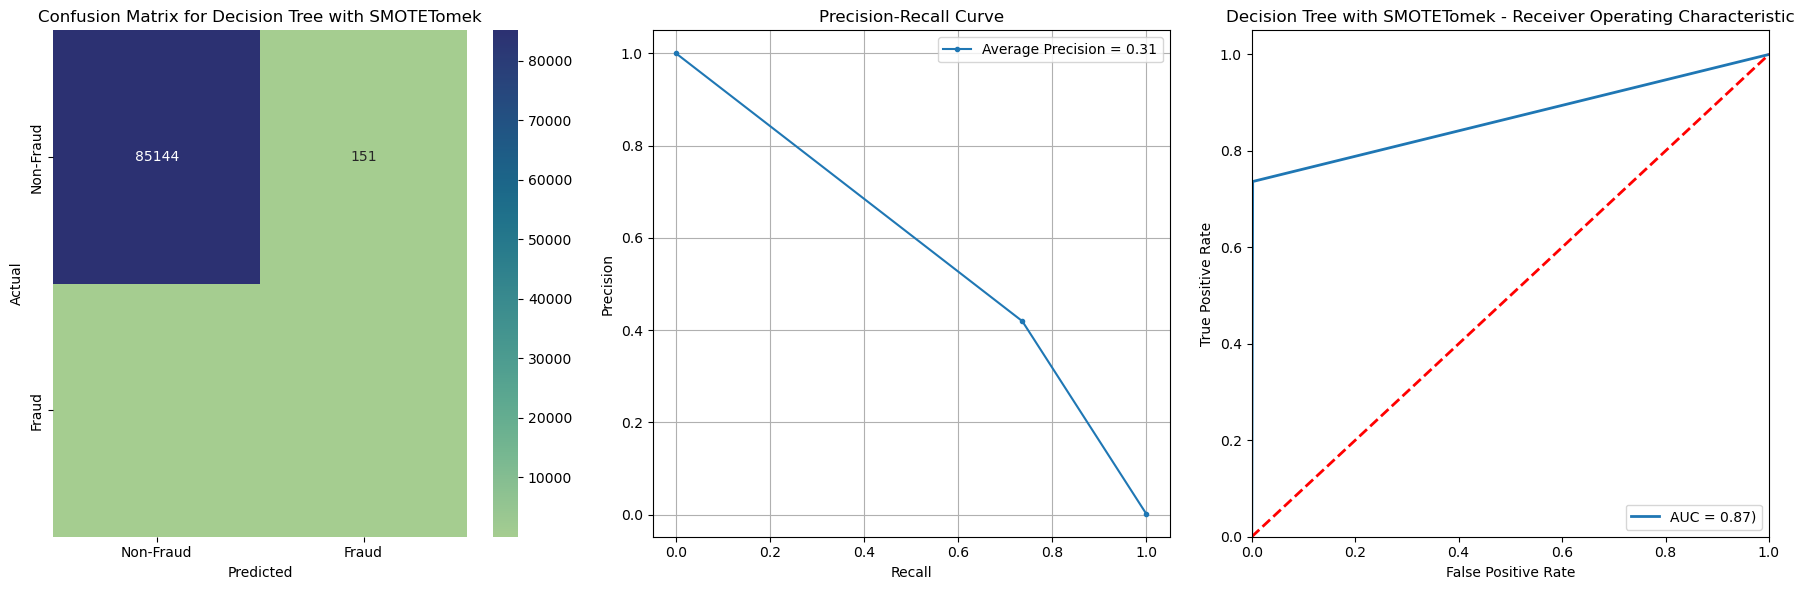

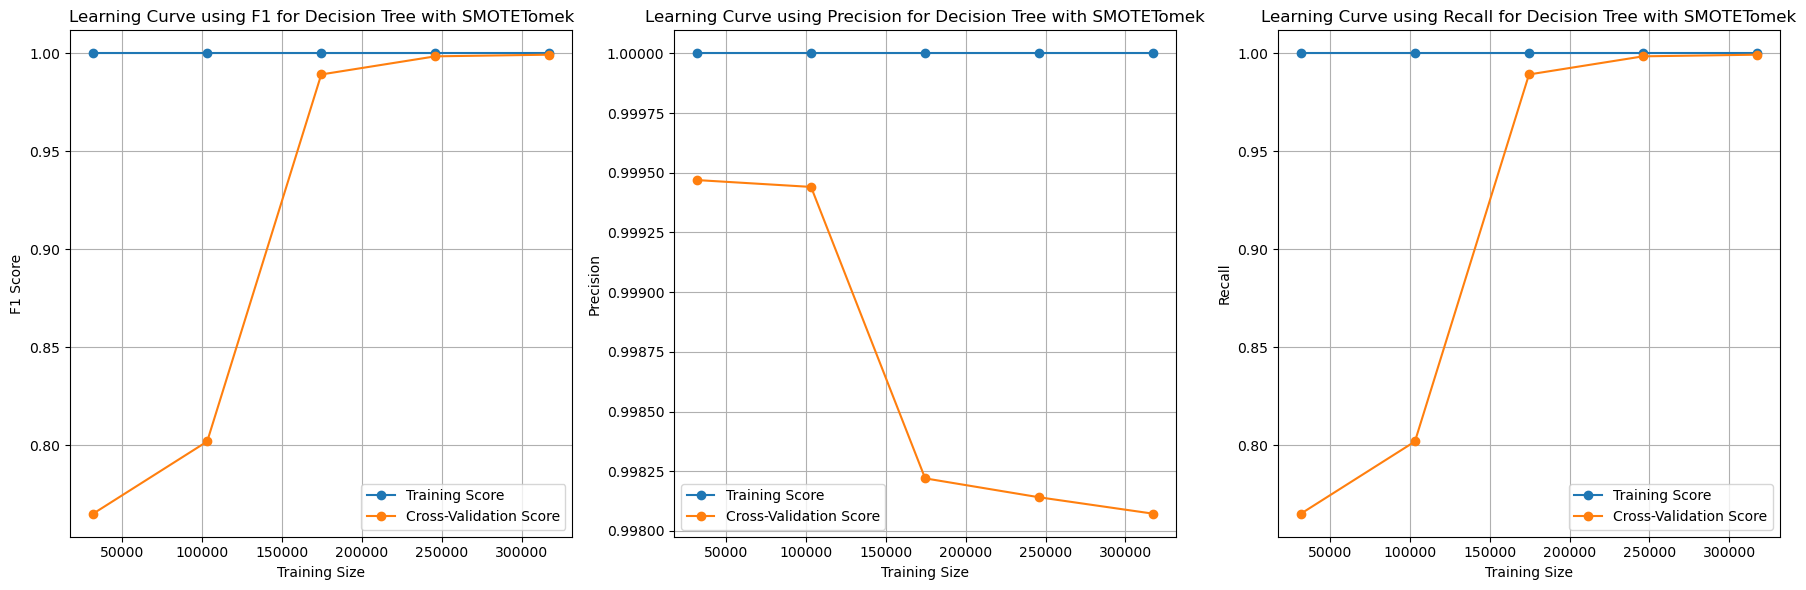

In [90]:
# Decision Tree SMOTE-Tomek
dt_model_smote_tomek = DecisionTreeClassifier(random_state=42)
dt_model_smote_tomek.fit(X_train_smote_tomek, y_train_smote_tomek)
y_pred_dt_smote_tomek = dt_model_smote_tomek.predict(X_test)
y_proba_dt_smote_tomek = dt_model_smote_tomek.predict_proba(X_test)[:, 1]
evaluate_model("Decision Tree with SMOTETomek", dt_model_smote_tomek, X_train_smote_tomek, y_train_smote_tomek, X_test, y_test, y_pred_dt_smote_tomek,y_proba_dt_smote_tomek)
learning_curves(dt_model, "Decision Tree with SMOTETomek", X_train_smote_tomek, y_train_smote_tomek)
all_metrics['Decision Tree with SMOTETomek'] = record_metrics('Decision Tree with SMOTETomek', dt_model_smote_tomek, X_train_smote_tomek, y_train_smote_tomek, X_test, y_test, y_pred_dt_smote_tomek,y_proba_dt_smote_tomek)

The Model is Severely Underfitting after Oversampling with SMOTE-Tomek based of F1, Recall and Precission as the Trianing Score Increases

The Classification Model still has has a good recall score but it is still showing underfitting for small training sizes

FurtherMore the Average Precision-Recall is less than 0.31 which is very poor performance for a classifier after Balancing the Datasets using SMOTE-Tomek showing no improvement from SMOTE Oversampling the Datasets

Training Score: 0.9950083152749081
Test Score: 0.9946514050302541
Model is Generalizing Well
Model: eXtreme Gradient Boosting (XGB) with SMOTETomek
Accuracy: 0.9946514050302541
F1 Score: 0.3554301833568406
F2 Score: 0.546400693842151
F0.5 Score: 0.2633779264214047
Precision: 0.22459893048128343
Recall: 0.8513513513513513
ROC-AUC Score: 0.9587176381493165


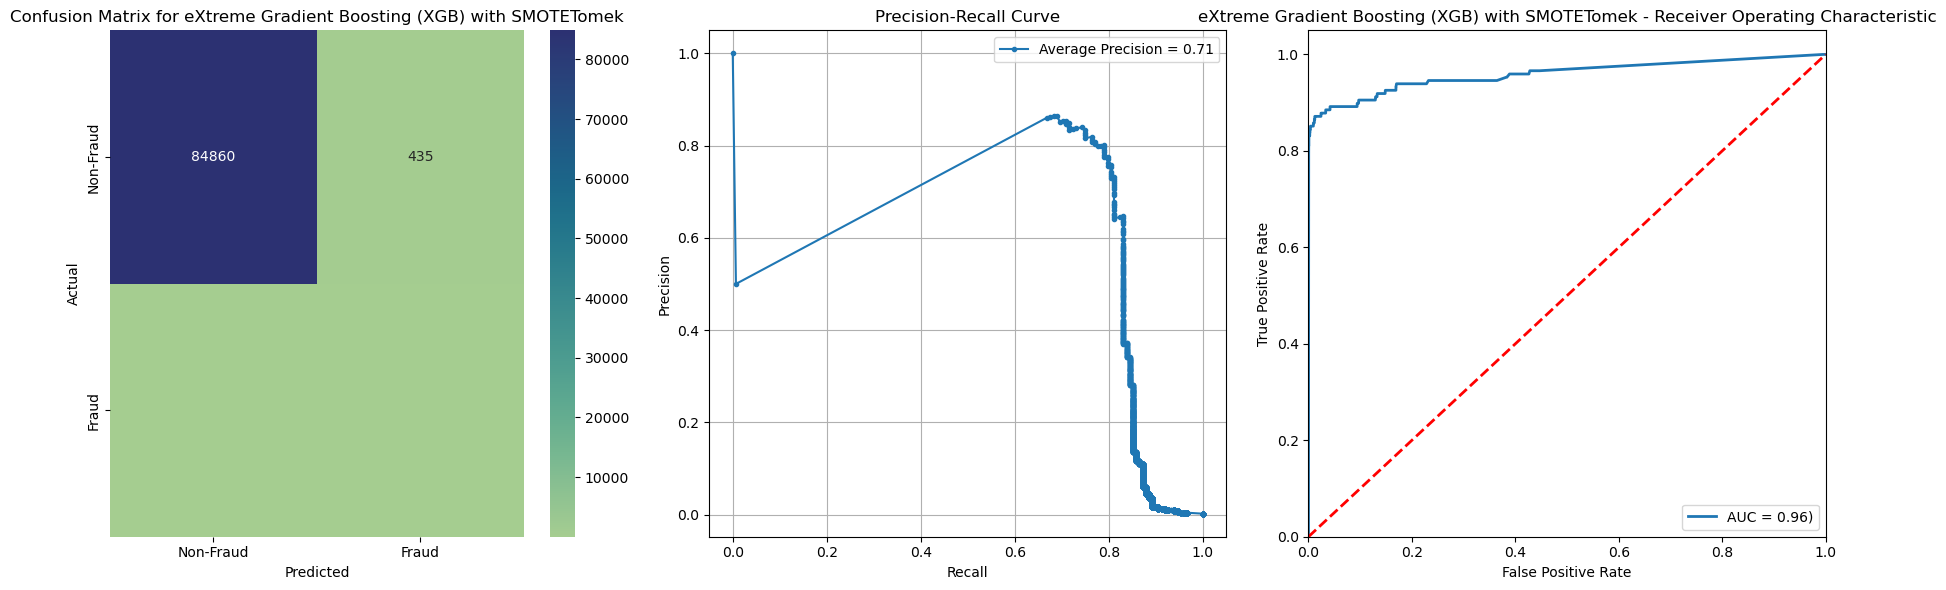

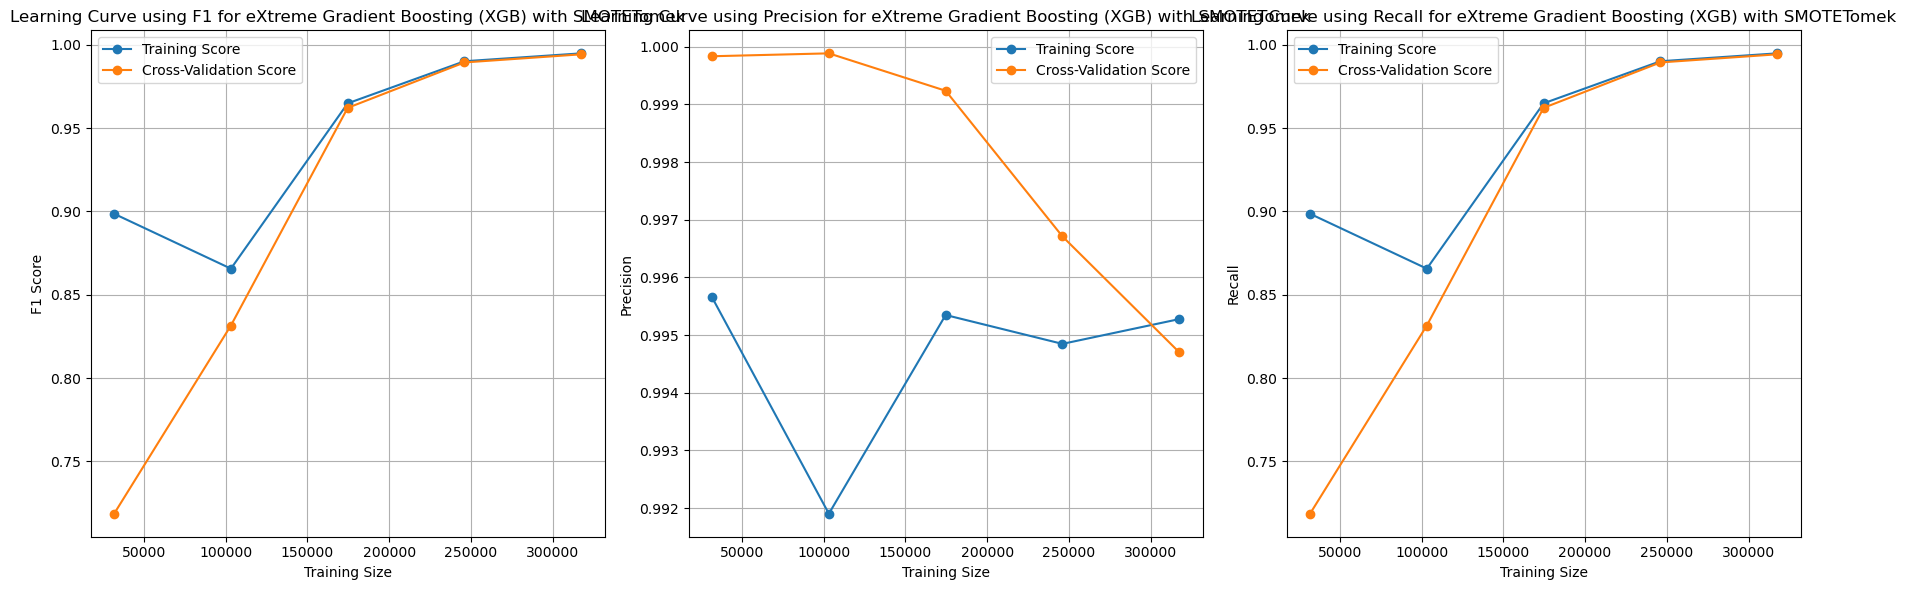

In [91]:
# eXtreme Gradient Boosting (XGB) SMOTETomek
xgb_model_smote_tomek = XGBClassifier(n_estimators=10)
xgb_model_smote_tomek.fit(X_train_smote_tomek, y_train_smote_tomek)
y_pred_xgb_smote_tomek = xgb_model_smote_tomek.predict(X_test)
y_proba_xgb_smote_tomek = xgb_model_smote_tomek.predict_proba(X_test)[:, 1]
evaluate_model("eXtreme Gradient Boosting (XGB) with SMOTETomek", xgb_model_smote_tomek, X_train_smote_tomek, y_train_smote_tomek, X_test, y_test, y_pred_xgb_smote_tomek,y_proba_xgb_smote_tomek)
learning_curves(xgb_model, "eXtreme Gradient Boosting (XGB) with SMOTETomek", X_train_smote_tomek, y_train_smote_tomek)
all_metrics['eXtreme Gradient Boosting (XGB) with SMOTETomek'] = record_metrics('eXtreme Gradient Boosting (XGB) with SMOTETomek', xgb_model_smote_tomek, X_train_smote_tomek, y_train_smote_tomek, X_test, y_test, y_pred_xgb_smote_tomek,y_proba_xgb_smote_tomek)

After balancing the data using the SMOTE-Tomek Techniques Model is showing severe underfitting and Low Precision and Recall Scores

Furthermore the Average Precision-Recall Score is decresed indicating not a good performance with Balanced data showing no improvement from SMOTE Oversampling Method

In [96]:
metrics_list=[]
for model_name, metrics in all_metrics.items():
    df_model = pd.DataFrame(metrics)
    df_model['model']=model_name
    metrics_list.append(df_model)
df_metrics = pd.concat(metrics_list,ignore_index=True)

In [97]:
df_metrics

,accuracy,f1_score,precision,recall,roc_auc,confusion_matrix,roc_curve,model
0,0.999087,0.727273,0.753623,0.702703,0.912125,"[[85261, 34], [44, 104]]","([0.0, 0.0, 0.0, 1.172401664810364e-05, 1.1724...",Logistic Regression
1,0.999181,0.756944,0.778571,0.736486,0.868062,"[[85264, 31], [39, 109]]","([0.0, 0.00036344451609121283, 1.0], [0.0, 0.7...",Decision Tree
2,0.999520,0.842912,0.973451,0.743243,0.954892,"[[85292, 3], [38, 110]]","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",eXtreme Gradient Boosting (XGB)
3,0.979717,0.127831,0.069059,0.858108,0.944753,"[[83583, 1712], [21, 127]]","([0.0, 0.0001758602497215546, 0.00017586024972...",Logistic Regression with SMOTE
4,0.997753,0.531707,0.416031,0.736486,0.867346,"[[85142, 153], [39, 109]]","([0.0, 0.001793774547159857, 1.0], [0.0, 0.736...",Decision Tree with SMOTE
5,0.994019,0.328515,0.203915,0.844595,0.951981,"[[84807, 488], [23, 125]]","([0.0, 1.172401664810364e-05, 1.17240166481036...",eXtreme Gradient Boosting (XGB) with SMOTE
6,0.982995,0.149795,0.081999,0.864865,0.955346,"[[83862, 1433], [20, 128]]","([0.0, 0.0001758602497215546, 0.00017586024972...",Logistic Regression with SMOTETomek
7,0.997776,0.534314,0.419231,0.736486,0.867358,"[[85144, 151], [39, 109]]","([0.0, 0.0017703265138636498, 1.0], [0.0, 0.73...",Decision Tree with SMOTETomek
8,0.994651,0.355430,0.224599,0.851351,0.958718,"[[84860, 435], [22, 126]]","([0.0, 1.172401664810364e-05, 0.00018758426636...",eXtreme Gradient Boosting (XGB) with SMOTETomek


After Comapring the Recall Scores

The best performing model is eXtreme Gradient Boosting (XGB) on Imbalced Dataset without smapling

The Precision-Recall Score is more than 0.82 indicating good Performance and AOC Score of 0.95 indicating a good fit